# Processing the Time interval data to aggregate frames as 1 hour interval values

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob, re, h5py
from utils.h5utils import load_h5_file, write_data_to_h5, aggregate_data_file

BASE_FOLDER = "./raw"
cities = [re.search(r".*/([A-Z]+)", s).group(1) for s in glob.glob(f"{BASE_FOLDER}/*/")]
print(cities)

['MOSCOW', 'BARCELONA', 'ANTWERP', 'BANGKOK']


In [2]:
channels = [(0, 'volume_NE'), (1, 'speed_NE'), (2, 'volume_NW'), (3, 'speed_NW'), (4, 'volume_SE'), (5, 'speed_SE'), (6, 'volume_SW'), (7, 'speed_SW'), (8, 'incidents')]

In [3]:
volumechannelsels = [(0, 'volume_NE'), (2, 'volume_NW'), (4, 'volume_SE'), (6, 'volume_SW')]

In [10]:
from utils.date_util import generate_date_range

pre_covid_range = generate_date_range("2019-04-01", "2019-06-30")
in_covid_range = generate_date_range("2020-04-01", "2020-06-30")

In [11]:
pre_covid_range,in_covid_range

(['2019-04-01',
  '2019-04-02',
  '2019-04-03',
  '2019-04-04',
  '2019-04-05',
  '2019-04-06',
  '2019-04-07',
  '2019-04-08',
  '2019-04-09',
  '2019-04-10',
  '2019-04-11',
  '2019-04-12',
  '2019-04-13',
  '2019-04-14',
  '2019-04-15',
  '2019-04-16',
  '2019-04-17',
  '2019-04-18',
  '2019-04-19',
  '2019-04-20',
  '2019-04-21',
  '2019-04-22',
  '2019-04-23',
  '2019-04-24',
  '2019-04-25',
  '2019-04-26',
  '2019-04-27',
  '2019-04-28',
  '2019-04-29',
  '2019-04-30',
  '2019-05-01',
  '2019-05-02',
  '2019-05-03',
  '2019-05-04',
  '2019-05-05',
  '2019-05-06',
  '2019-05-07',
  '2019-05-08',
  '2019-05-09',
  '2019-05-10',
  '2019-05-11',
  '2019-05-12',
  '2019-05-13',
  '2019-05-14',
  '2019-05-15',
  '2019-05-16',
  '2019-05-17',
  '2019-05-18',
  '2019-05-19',
  '2019-05-20',
  '2019-05-21',
  '2019-05-22',
  '2019-05-23',
  '2019-05-24',
  '2019-05-25',
  '2019-05-26',
  '2019-05-27',
  '2019-05-28',
  '2019-05-29',
  '2019-05-30',
  '2019-05-31',
  '2019-06-01',
  '2019-

In [13]:
from pathlib import Path
for city in cities:
    print(f"Aggregating {city}")
    for date in pre_covid_range:
        filename = f"{BASE_FOLDER}/{city}/training/{date}_{city}_8ch"
        aggregate_data_file(filename)
    for date in in_covid_range:
        filename = f"{BASE_FOLDER}/{city}/training/{date}_{city}_8ch"
        aggregate_data_file(filename)

Aggregating MOSCOW
Aggregating BARCELONA
Aggregating ANTWERP
Aggregating BANGKOK


## Flow networks at Noon For 3rd Apr 2019

(24, 495, 436, 8)


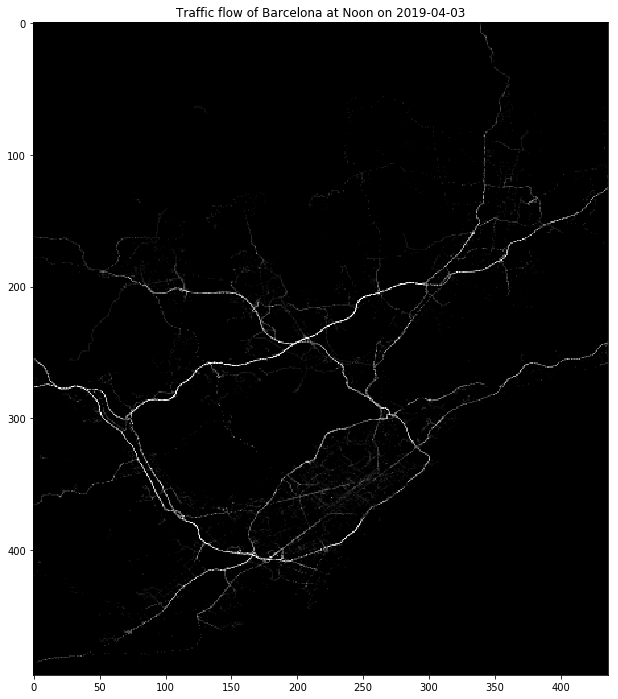

In [14]:
#rows = len(cities)
#rows = 1
#cols = 1
scale_factor = 12

#for i, city in enumerate(cities):
#    third_apr = load_h5_file(f"{BASE_FOLDER}/{city}/training/2019-04-03_{city}_8ch_aggregated.h5")
#    print(third_apr.shape)
#    map_at_noon = third_apr[12].sum(axis=(-1))
#    axs[i].imshow(map_at_noon[0:495, 0:436], cmap="gray", vmin=0, vmax=255)

city = 'BARCELONA'

third_apr = load_h5_file(f"{BASE_FOLDER}/{city}/training/2019-04-03_{city}_8ch_aggregated.h5")
print(third_apr.shape)
map_at_noon = third_apr[11].sum(axis=(-1))
plt.figure(figsize=(scale_factor, scale_factor))
plt.title("Traffic flow of Barcelona at Noon on 2019-04-03")
plt.imshow(map_at_noon[0:495, 0:436], cmap="gray", vmin=0, vmax=255)

Loaded data has shape (24, 495, 436, 8) with dtype uint8 between 0 and 255
Reading pixel 461,94


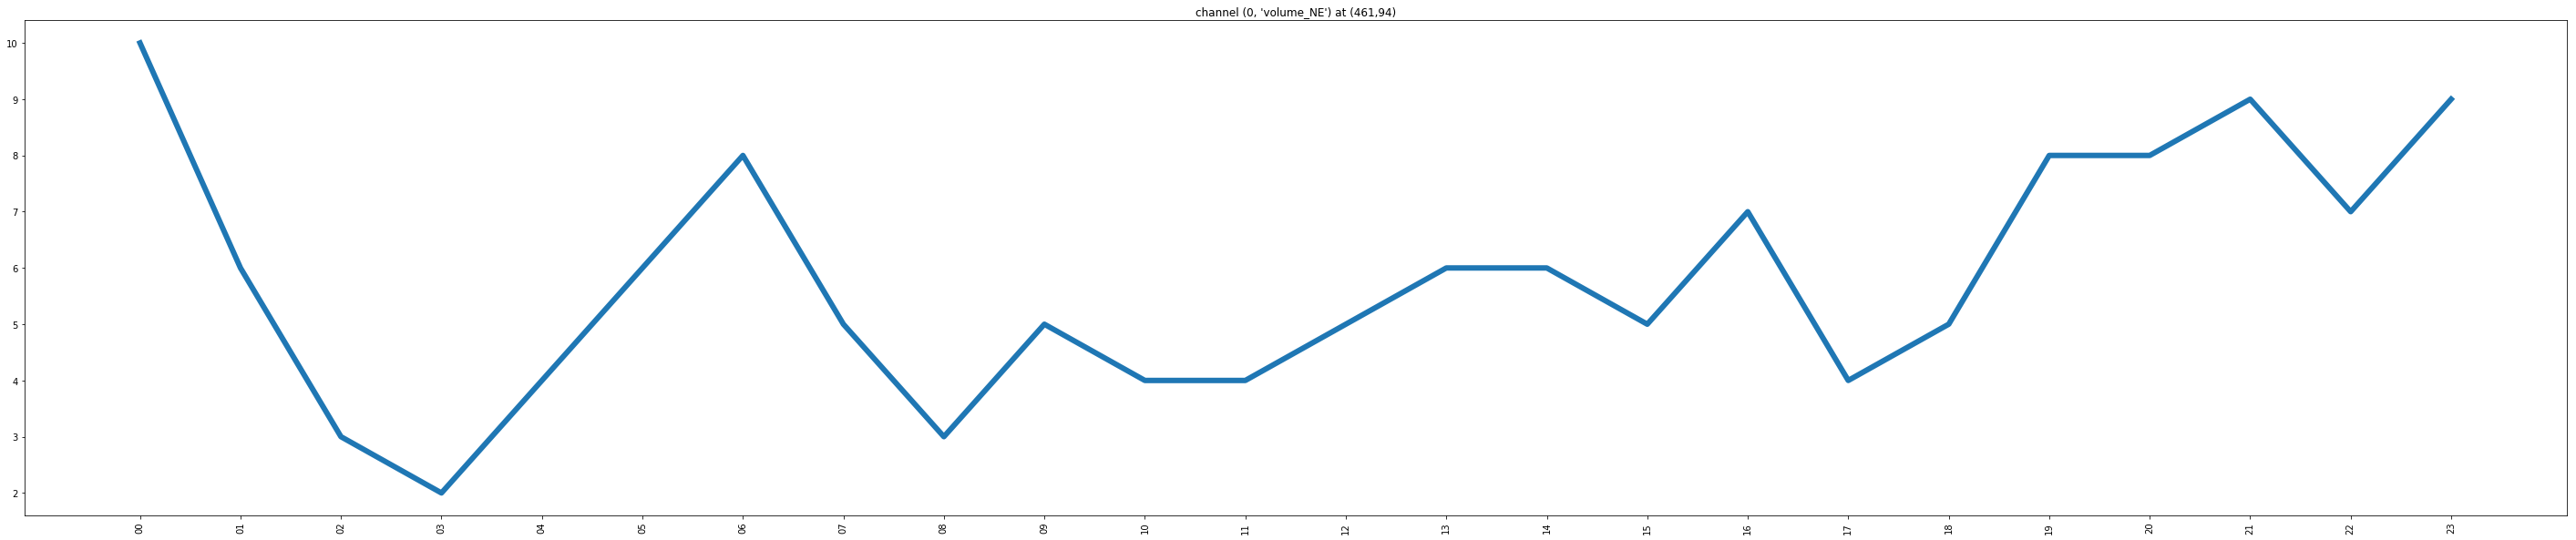

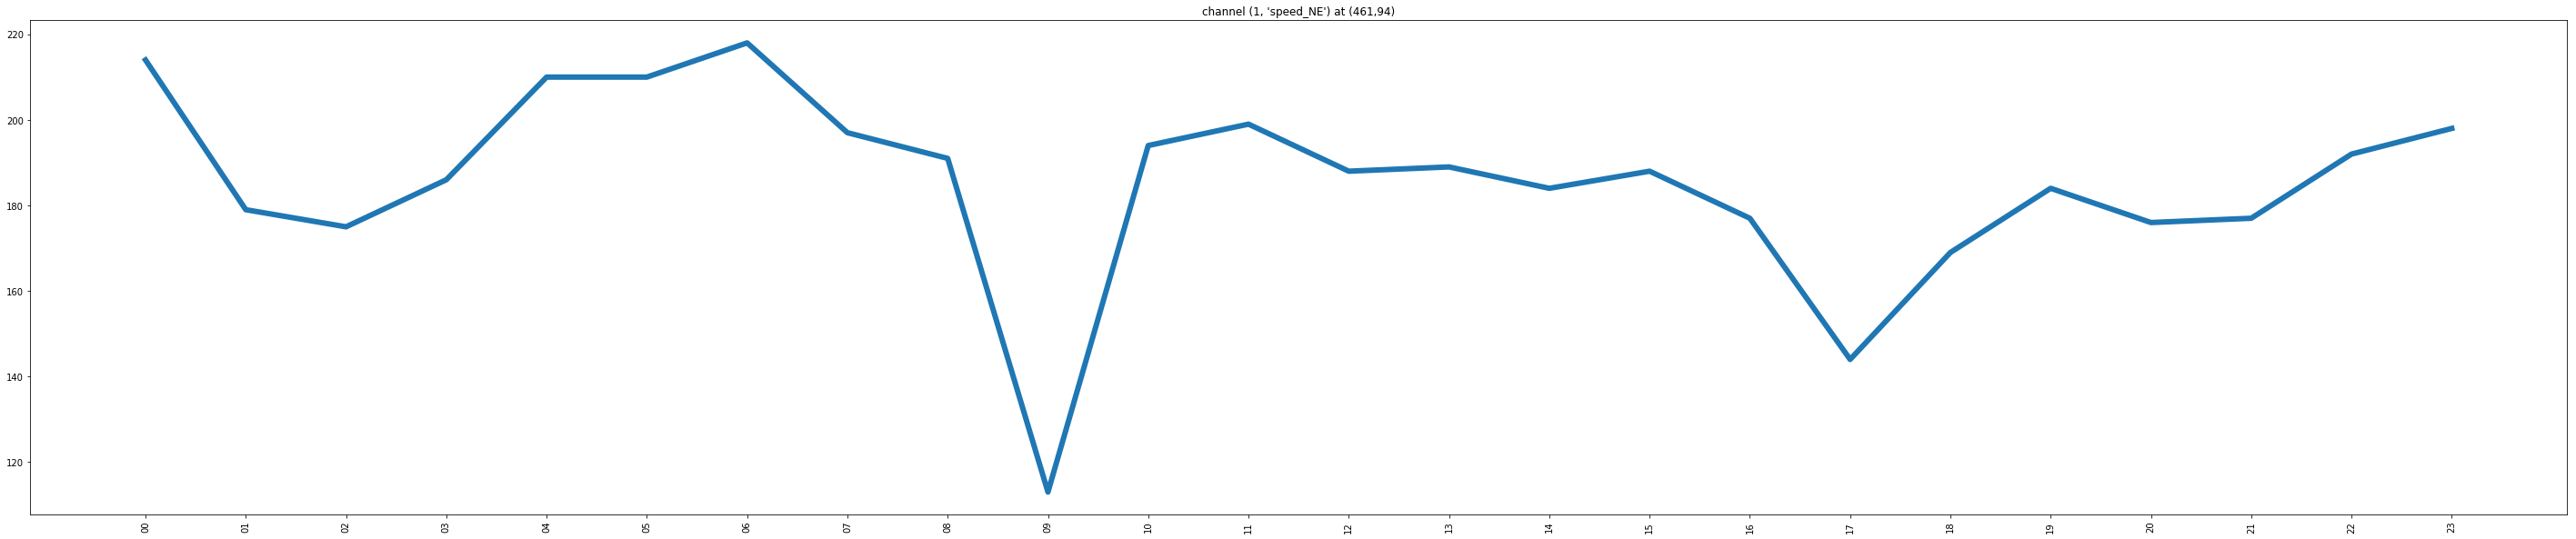

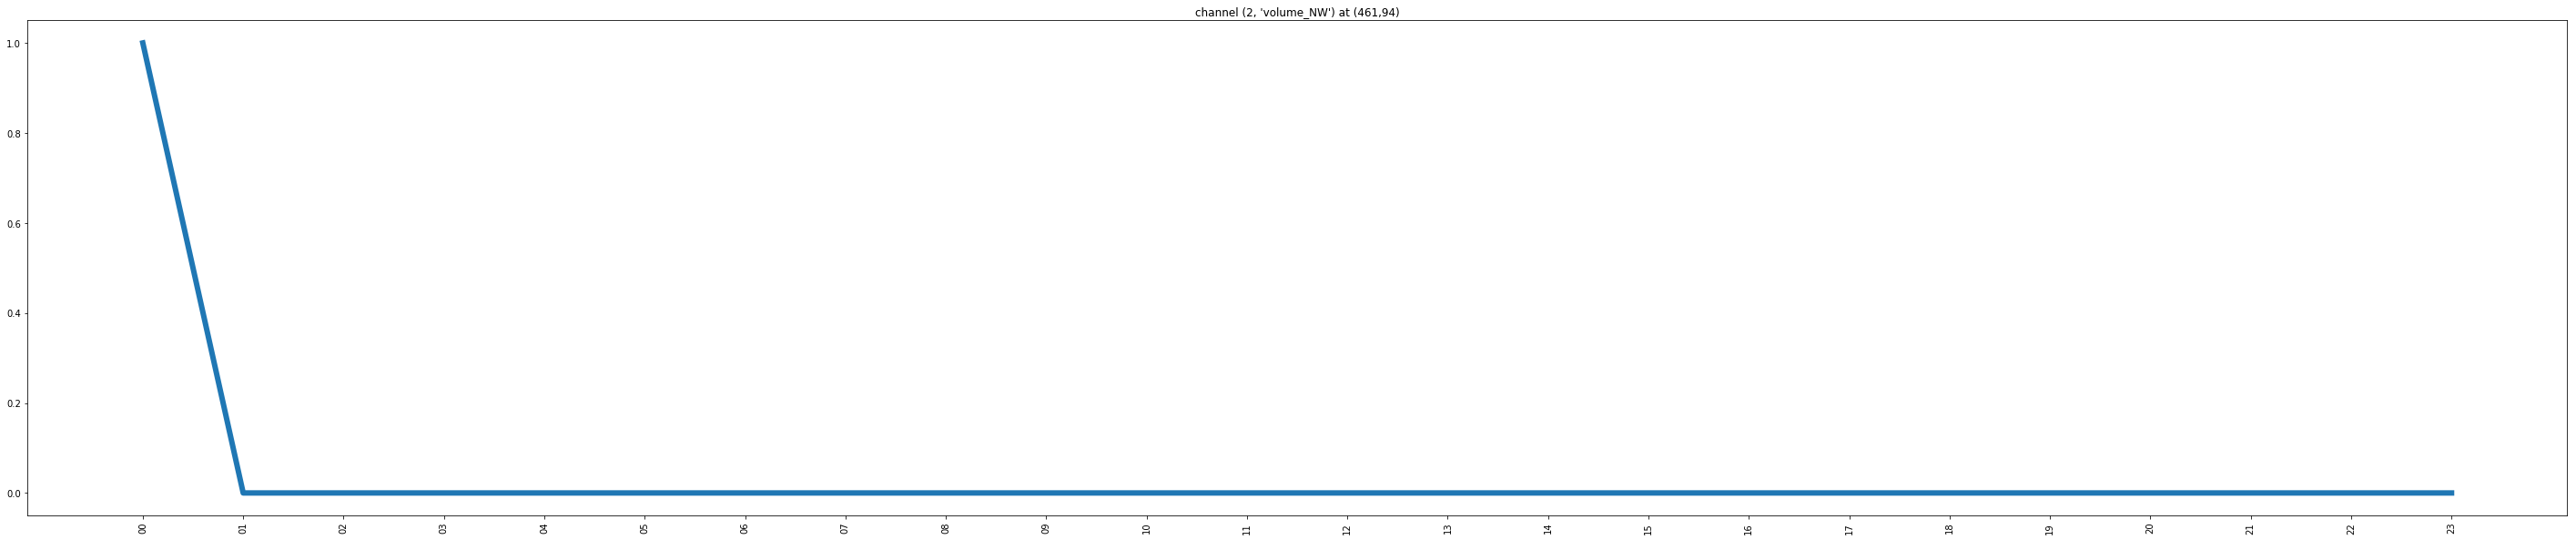

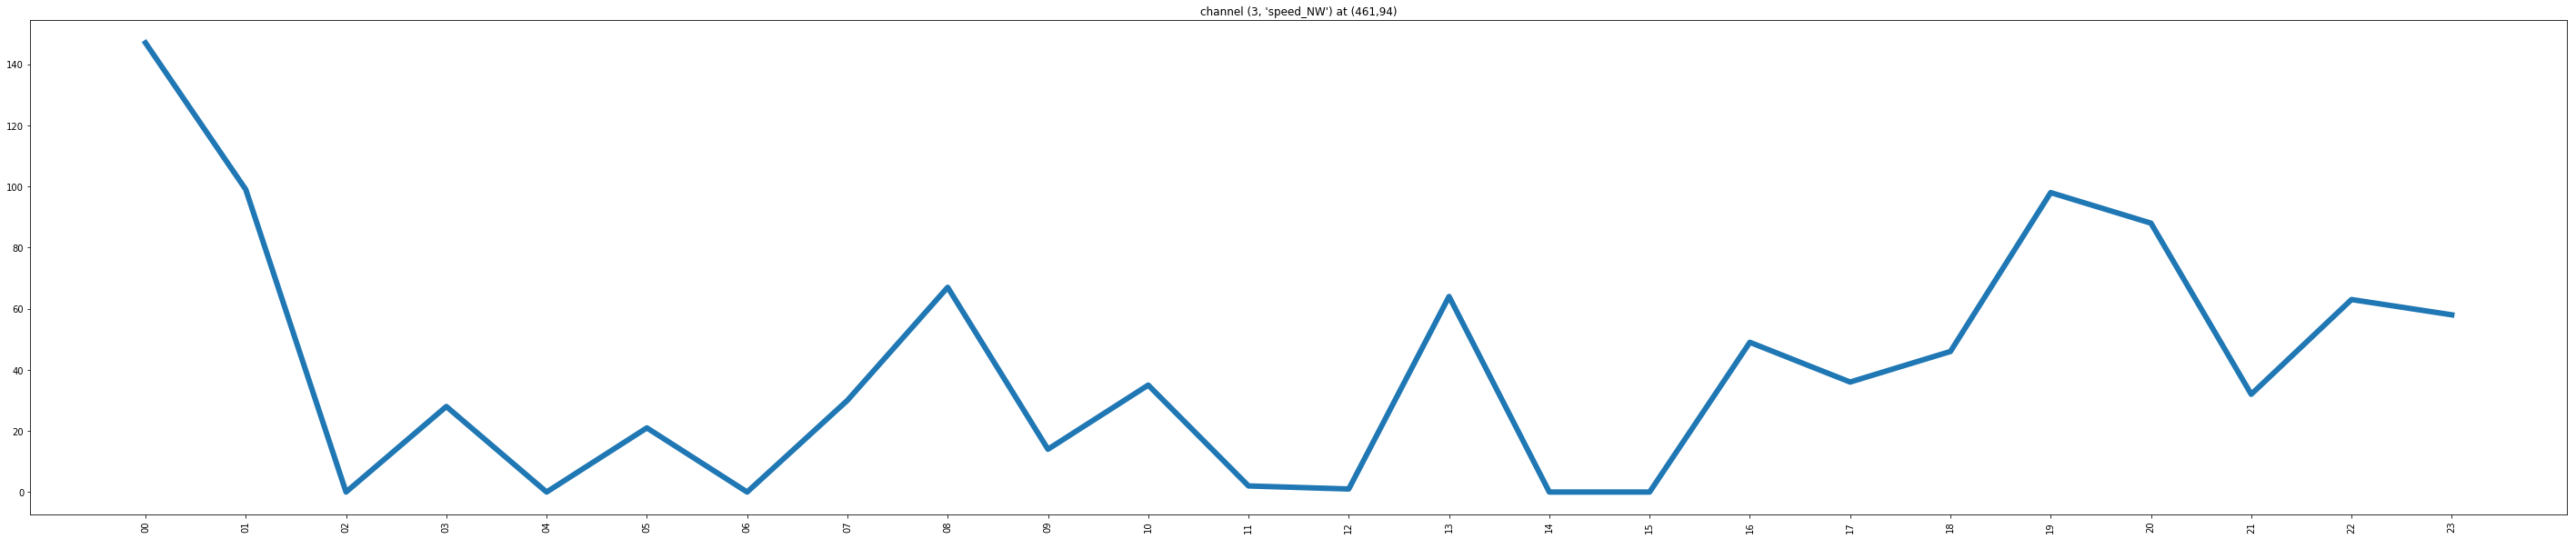

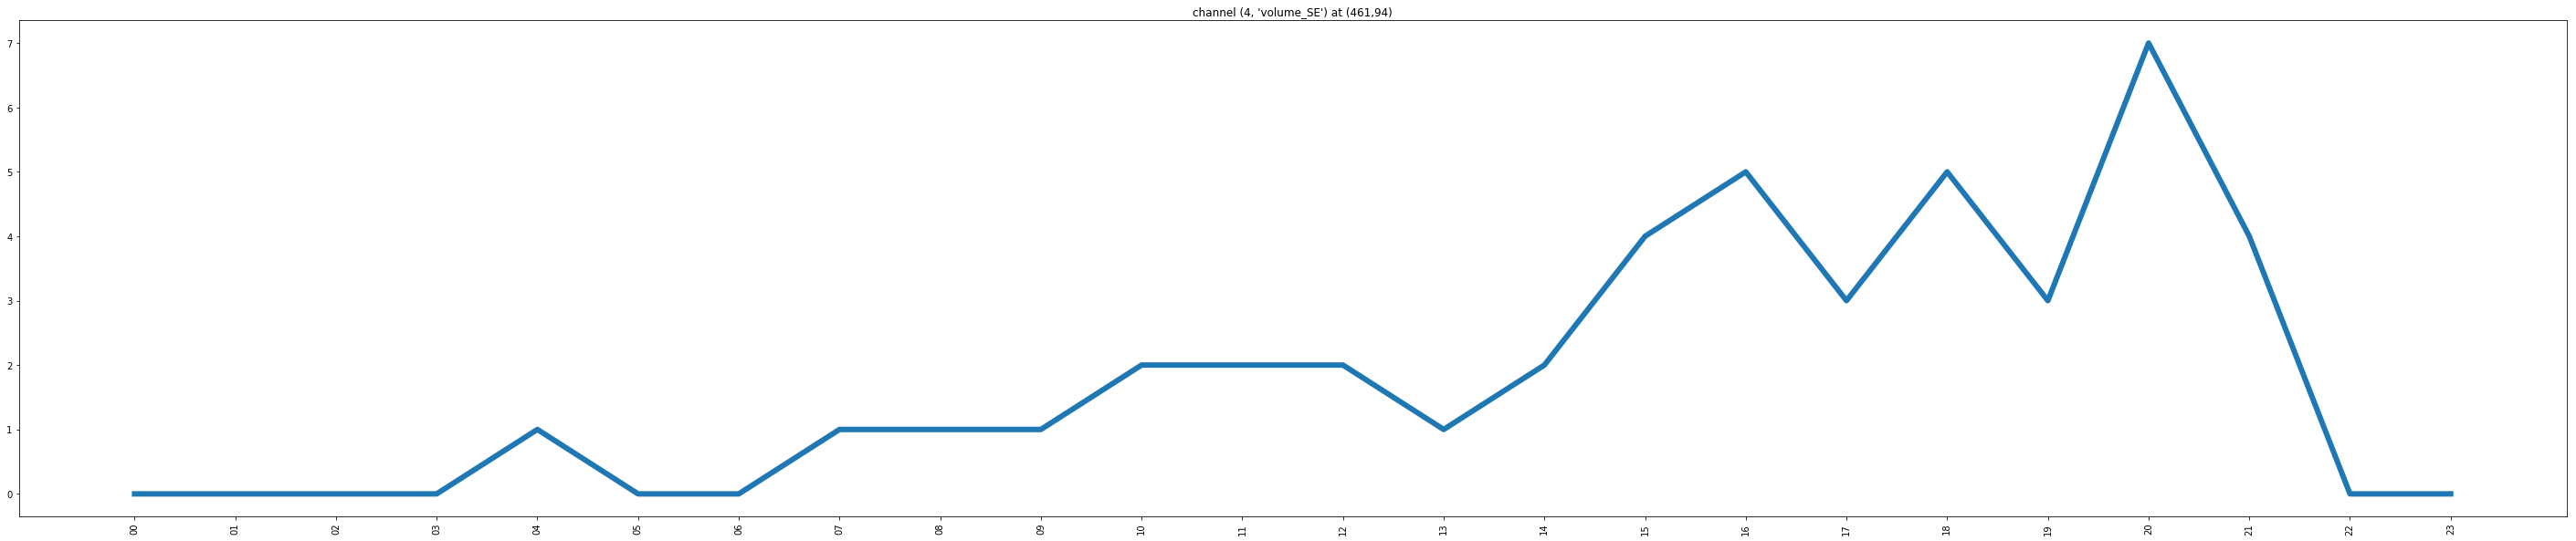

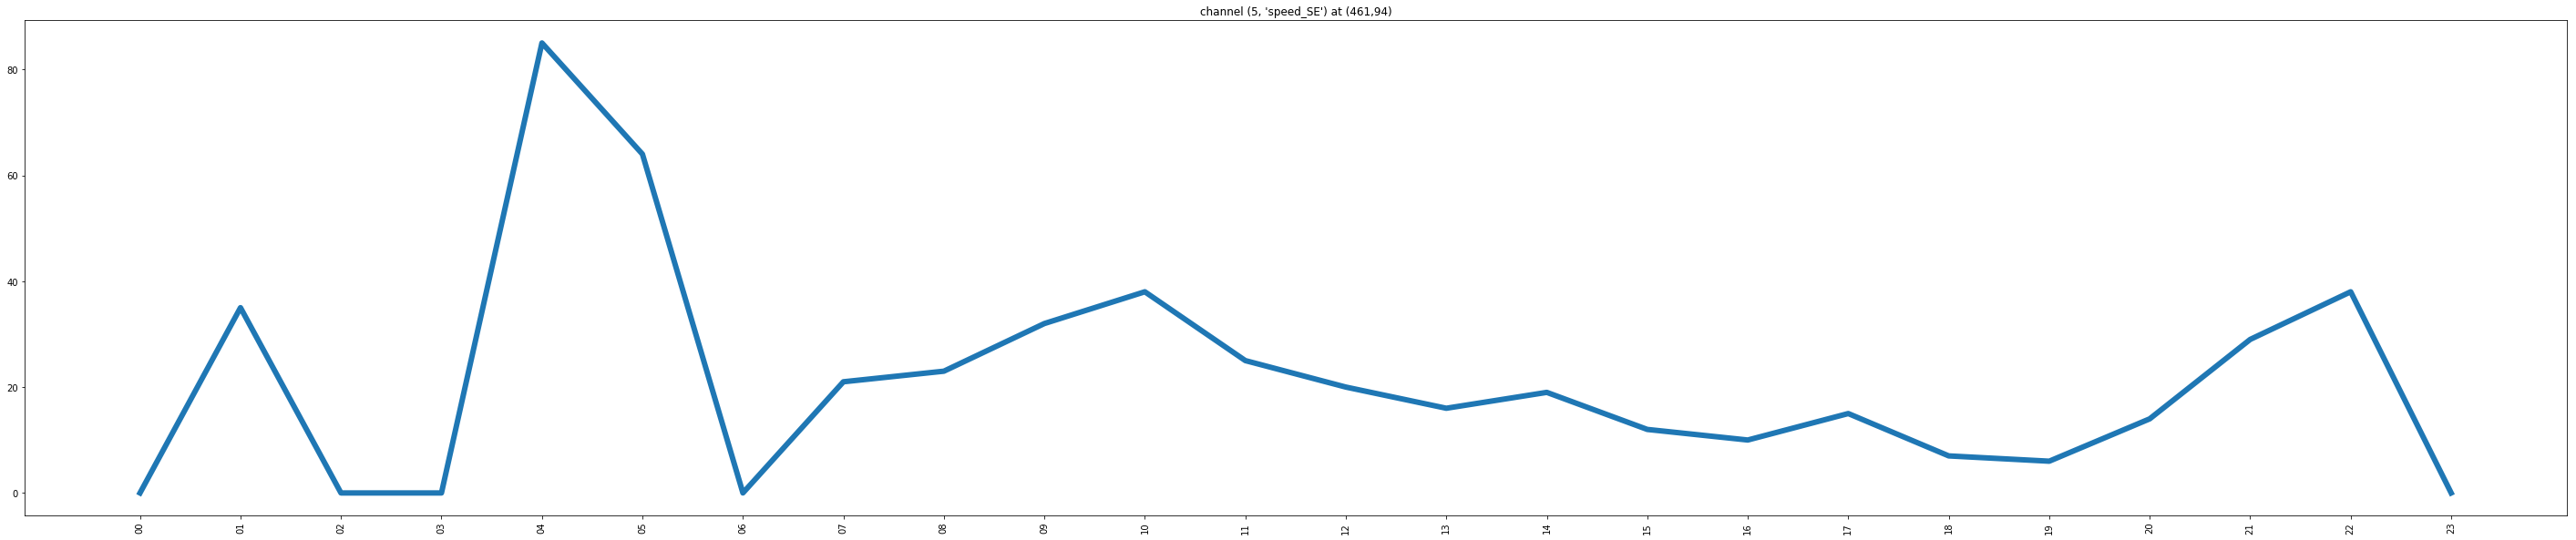

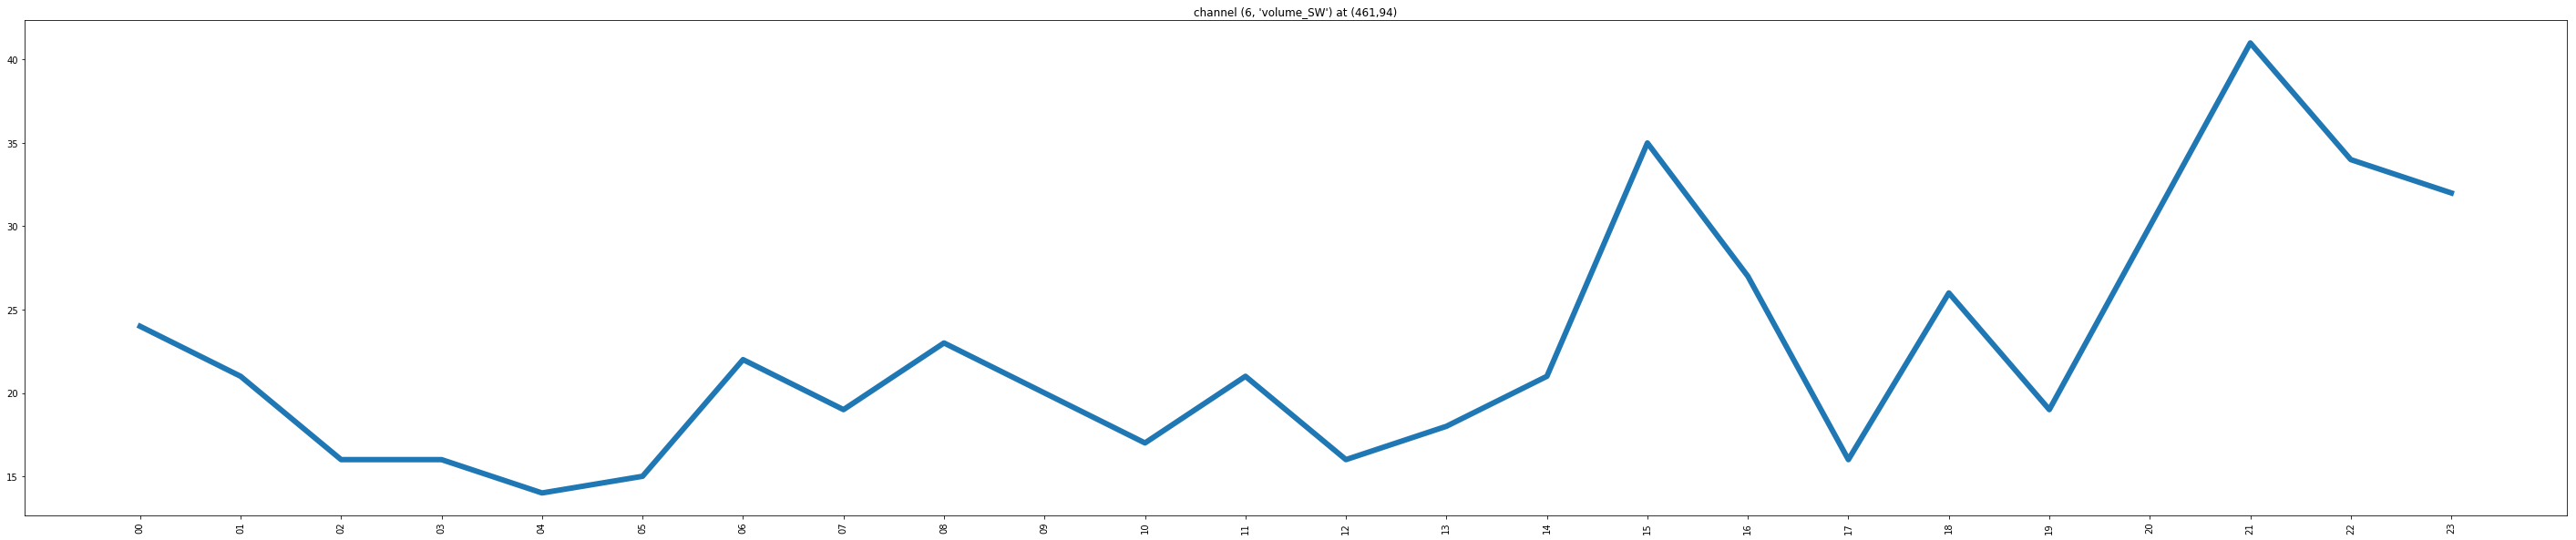

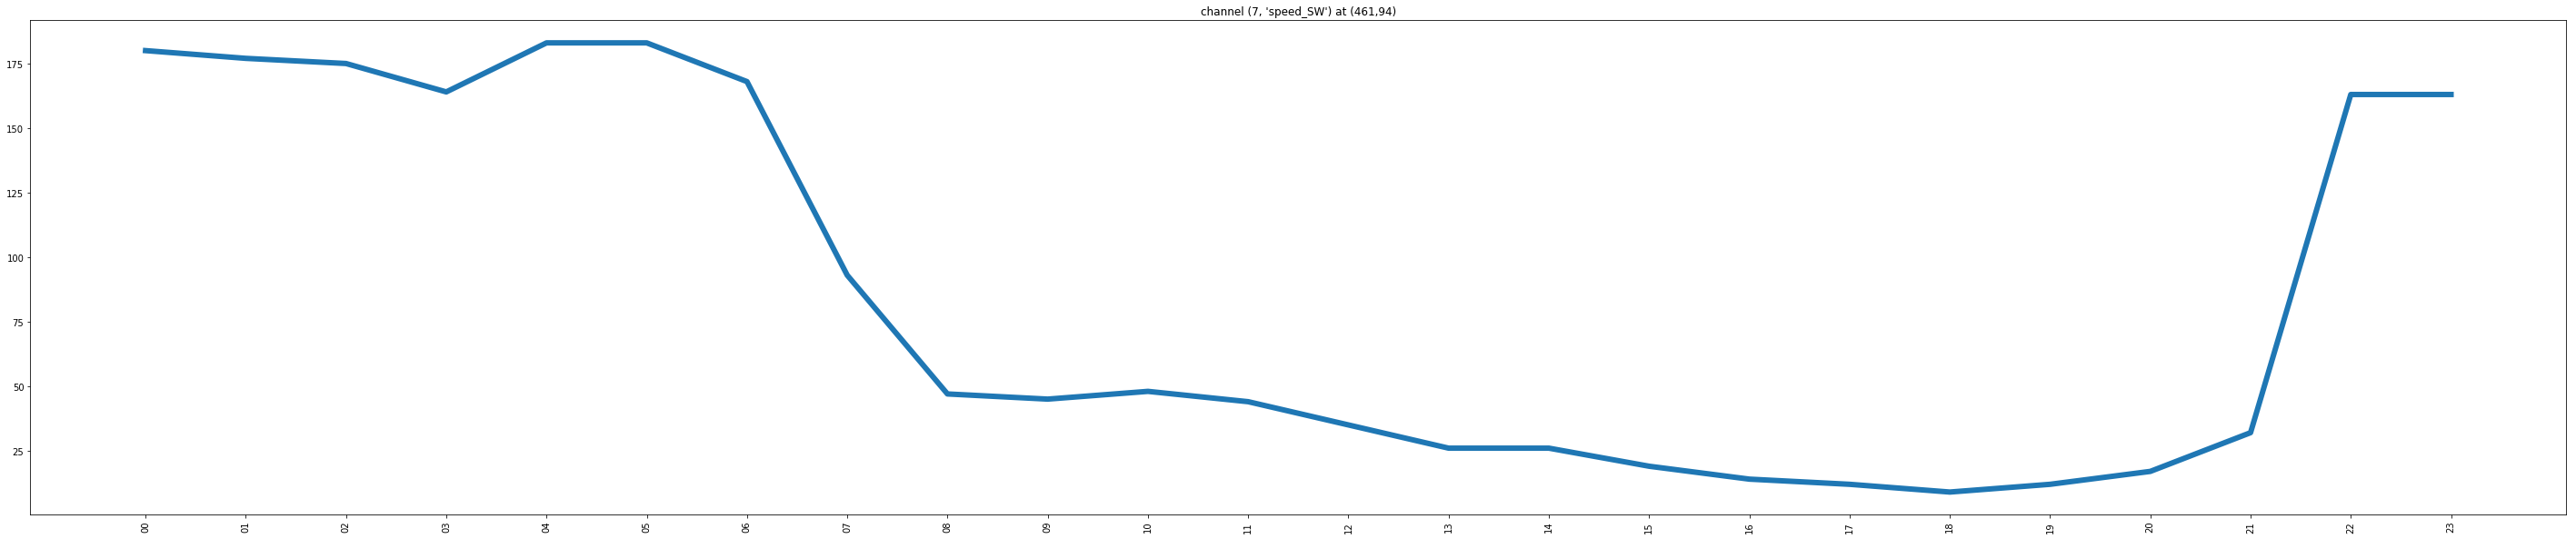

Loaded data has shape (24, 495, 436, 8) with dtype uint8 between 0 and 249
Reading pixel 212,246


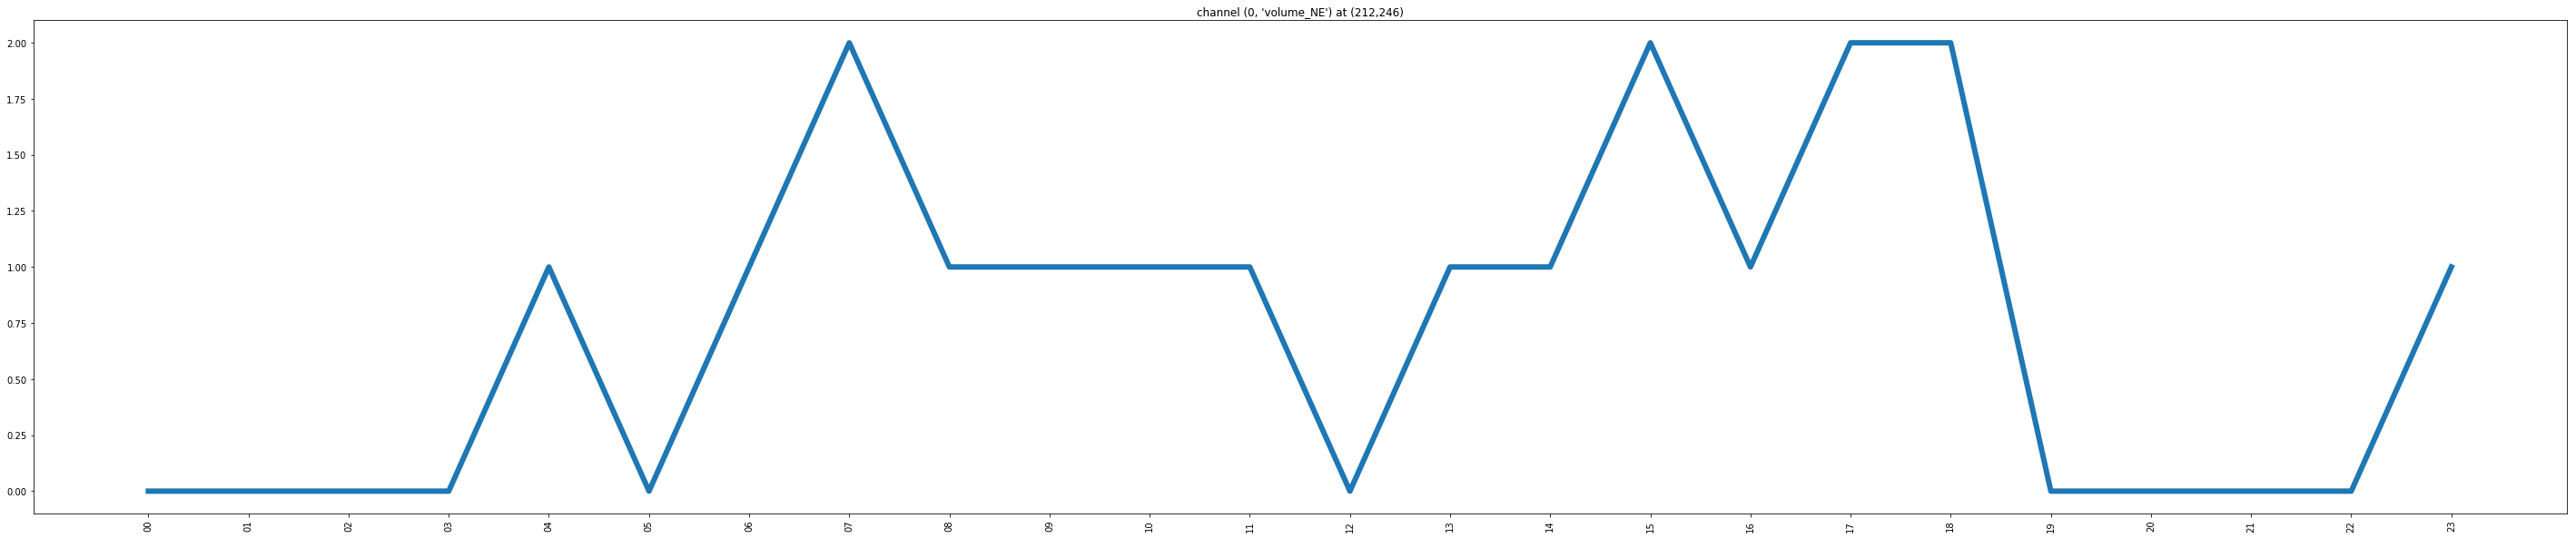

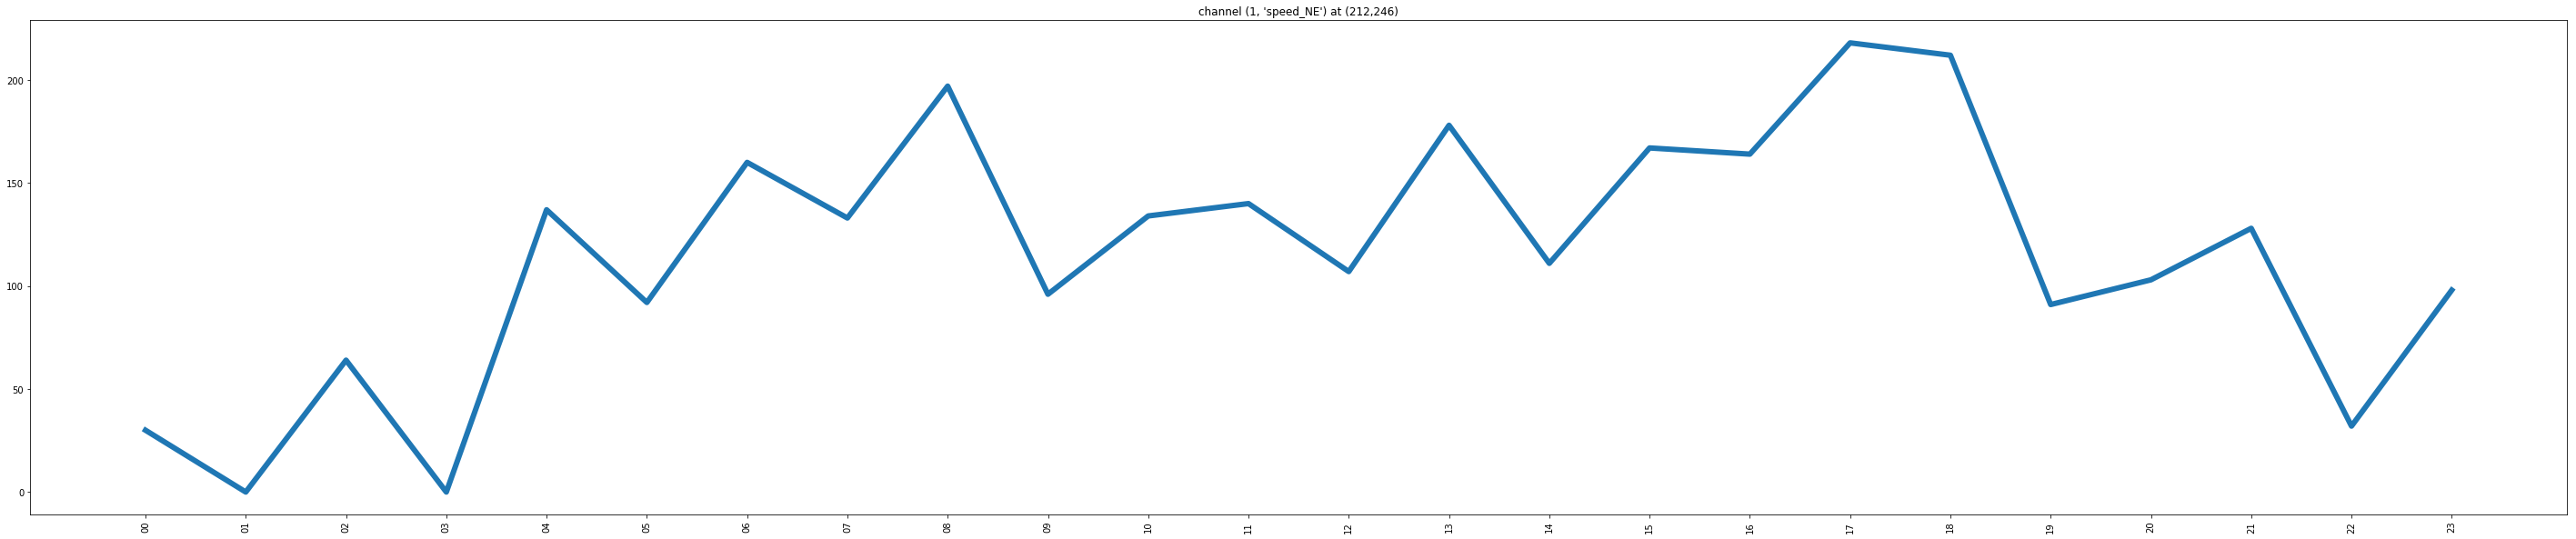

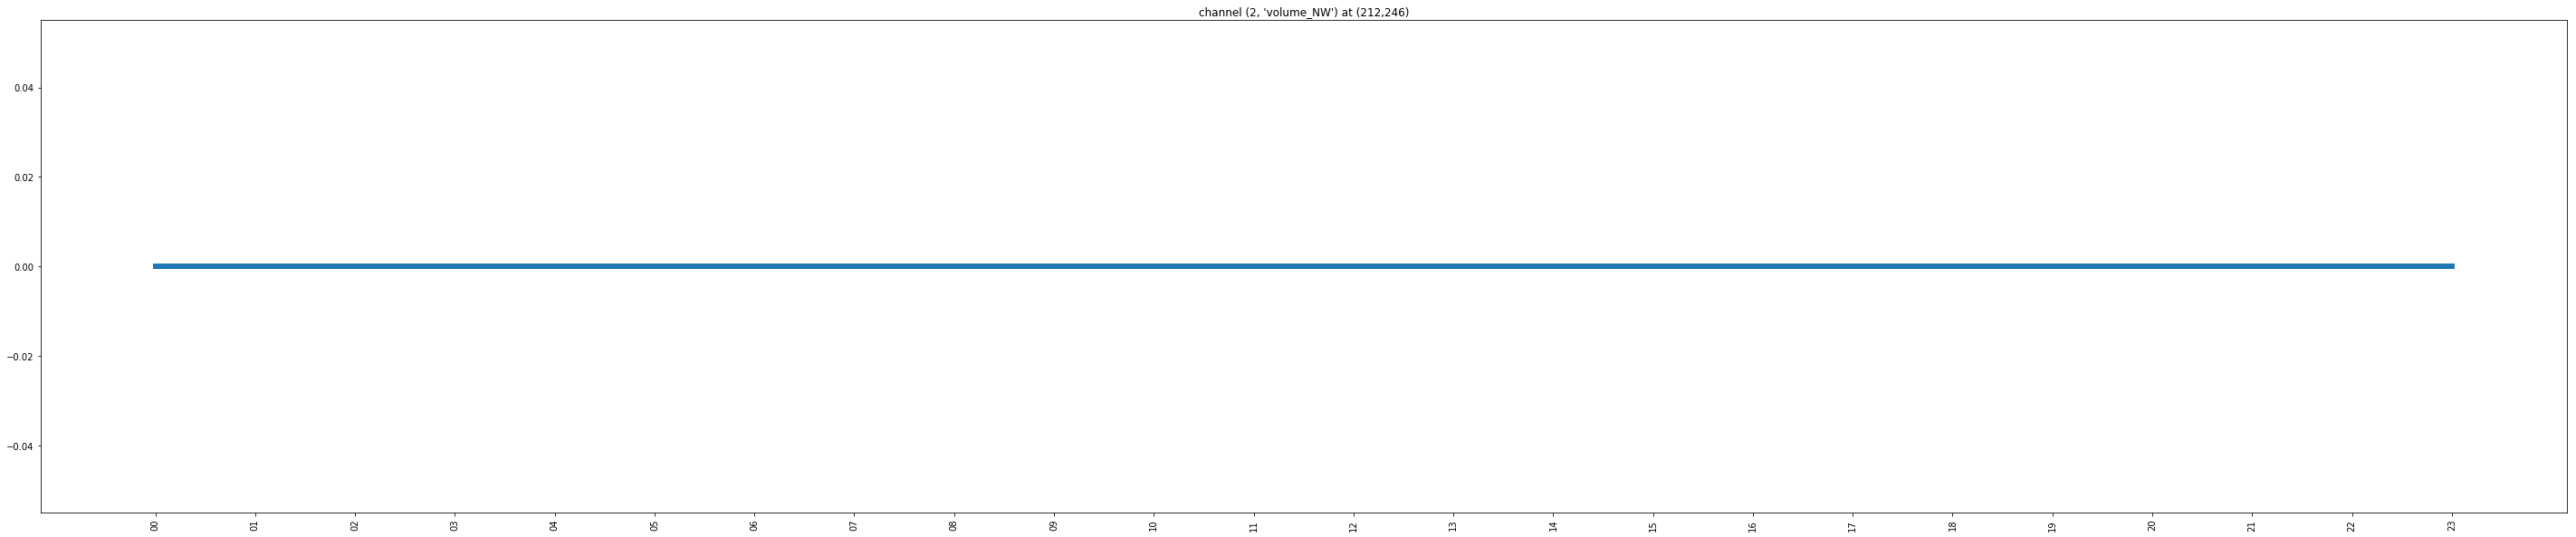

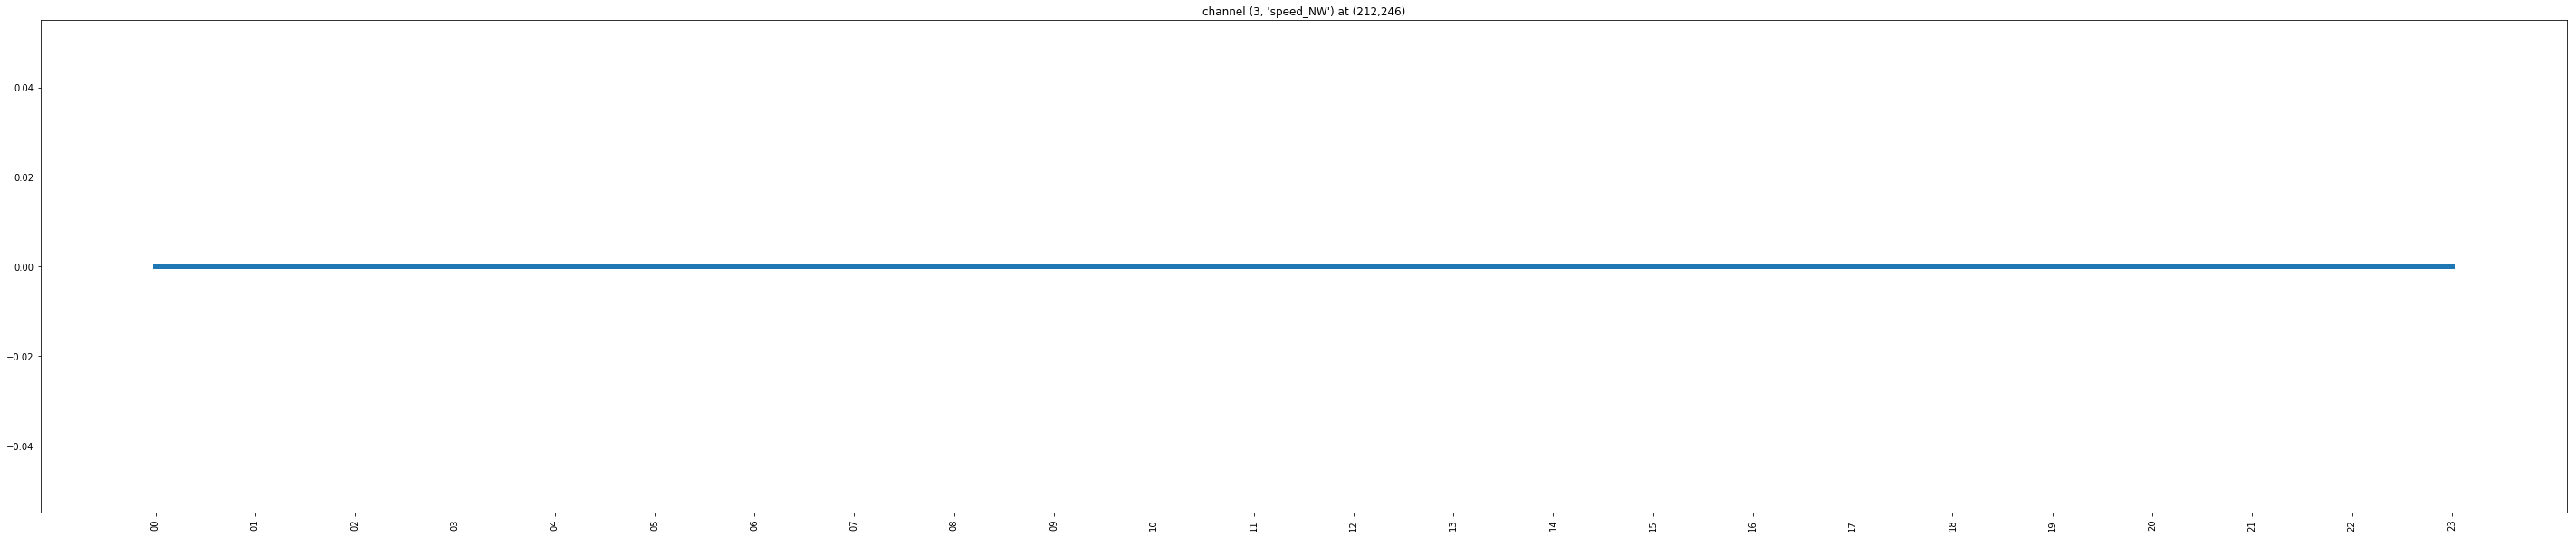

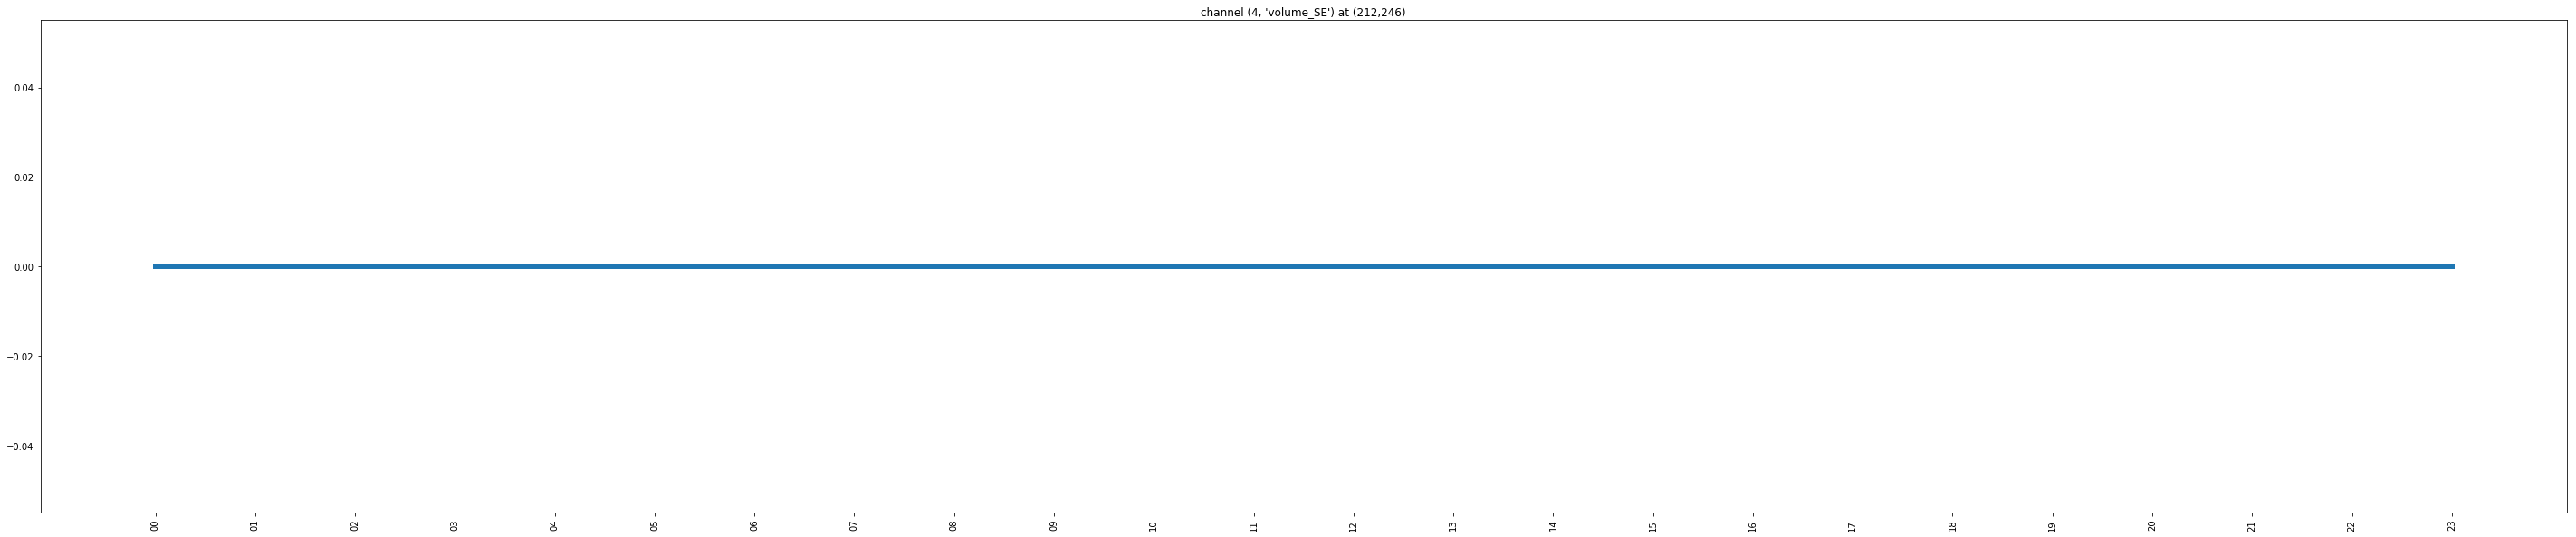

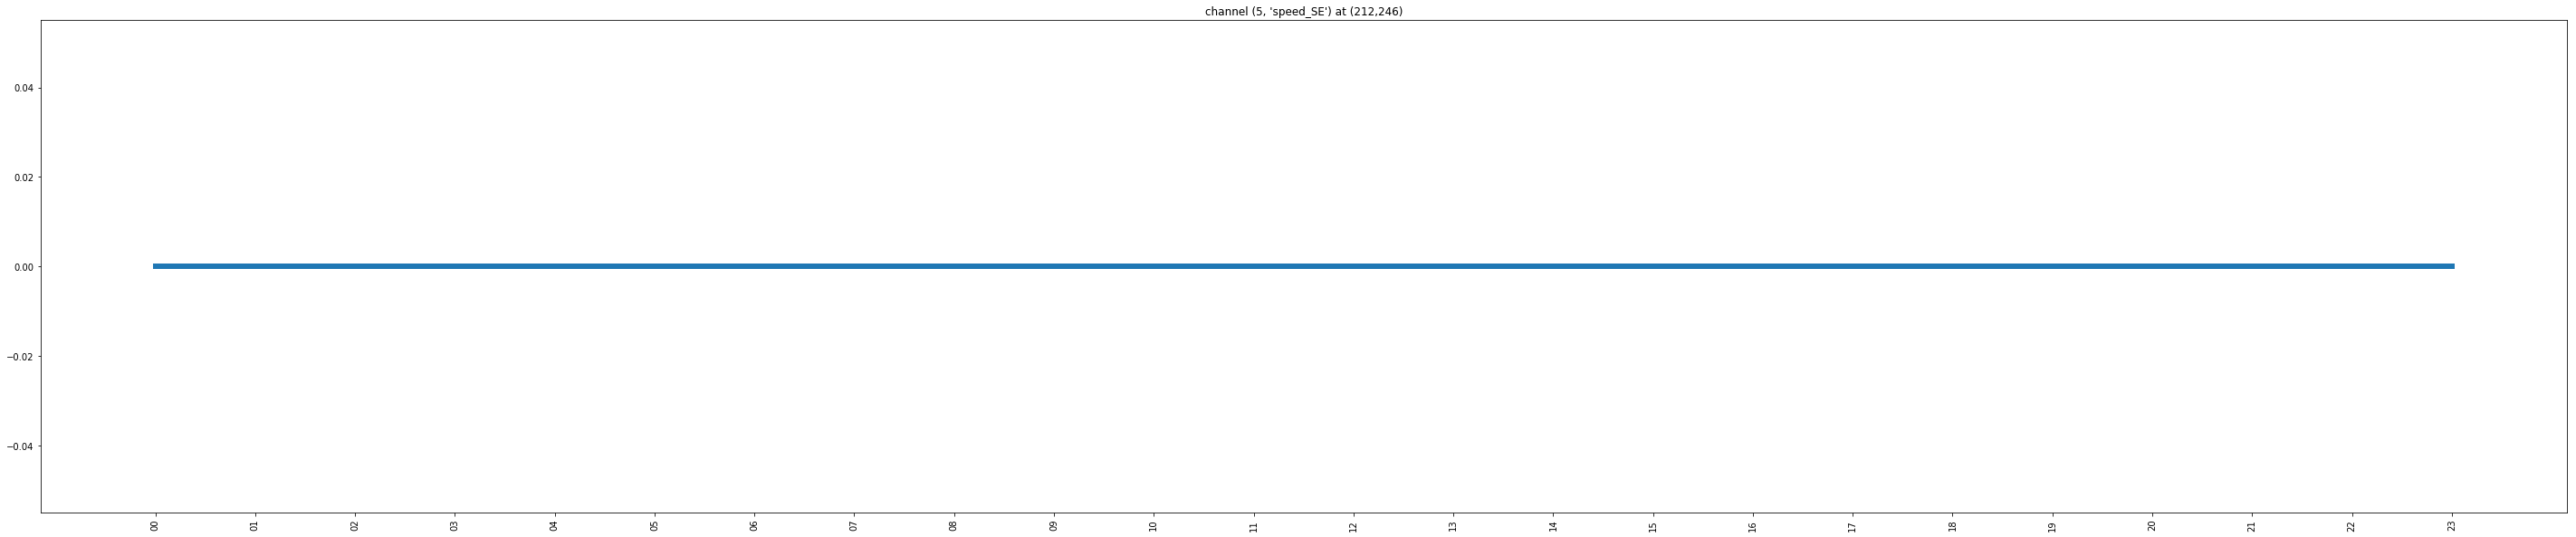

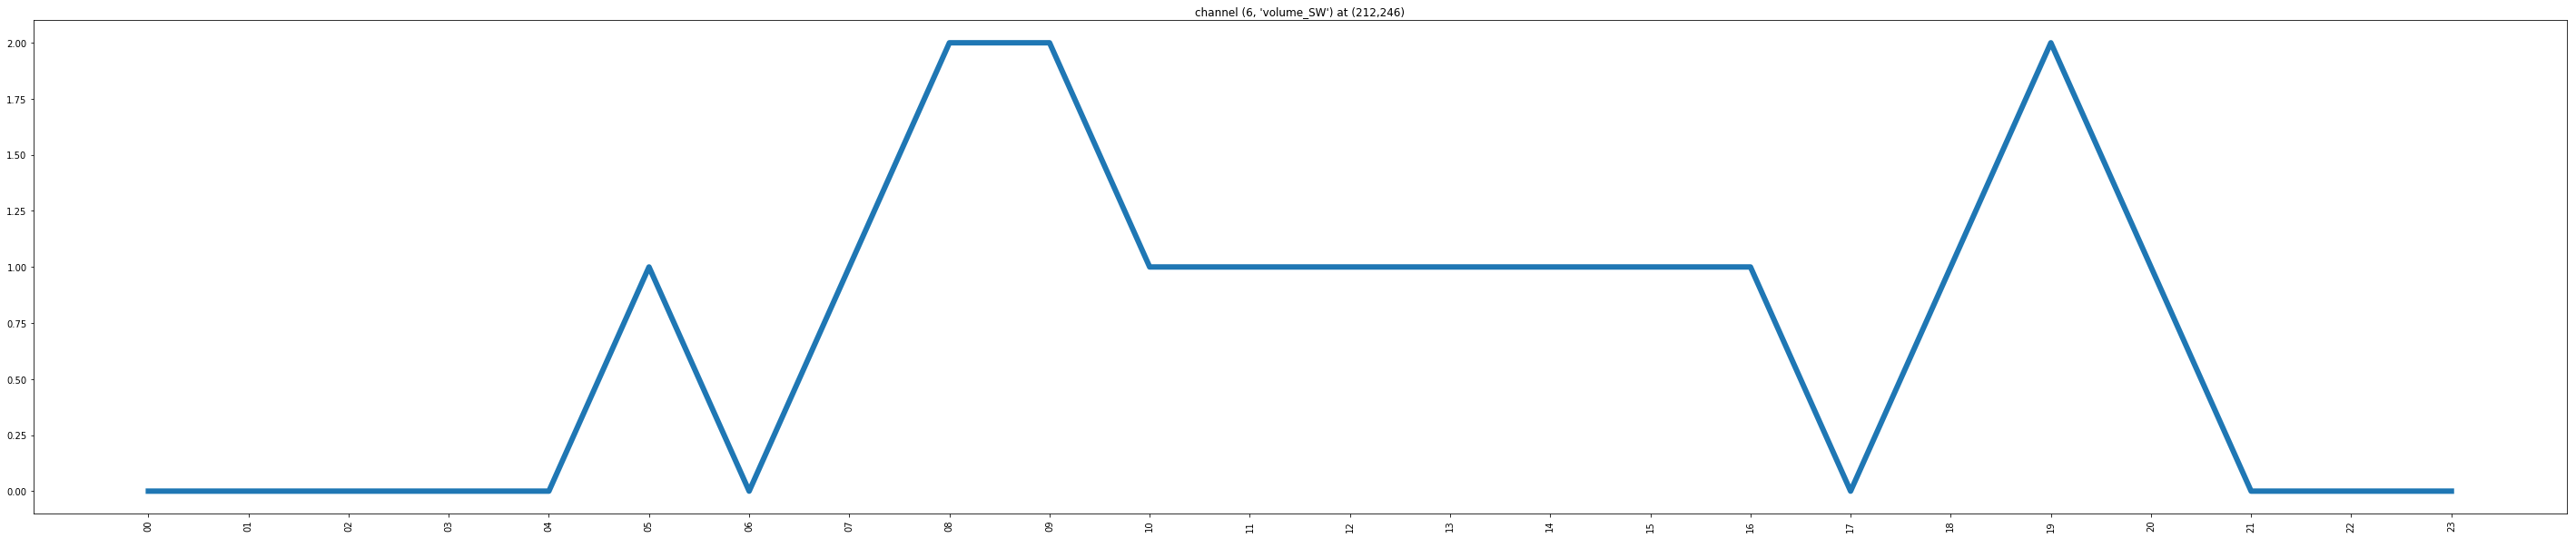

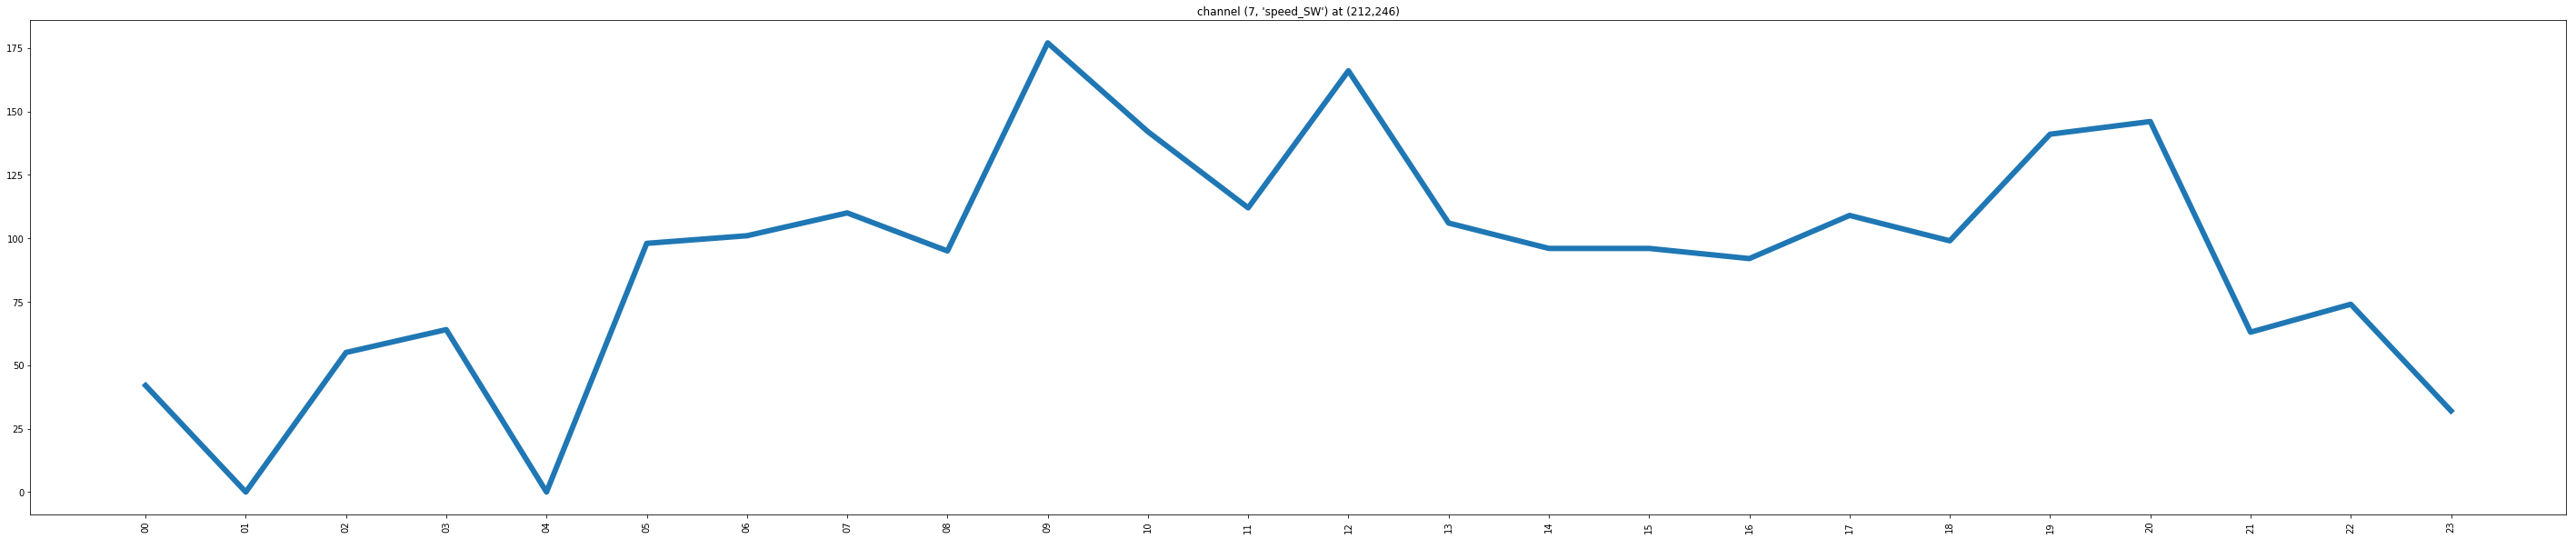

Loaded data has shape (24, 495, 436, 8) with dtype uint8 between 0 and 255
Reading pixel 349,0


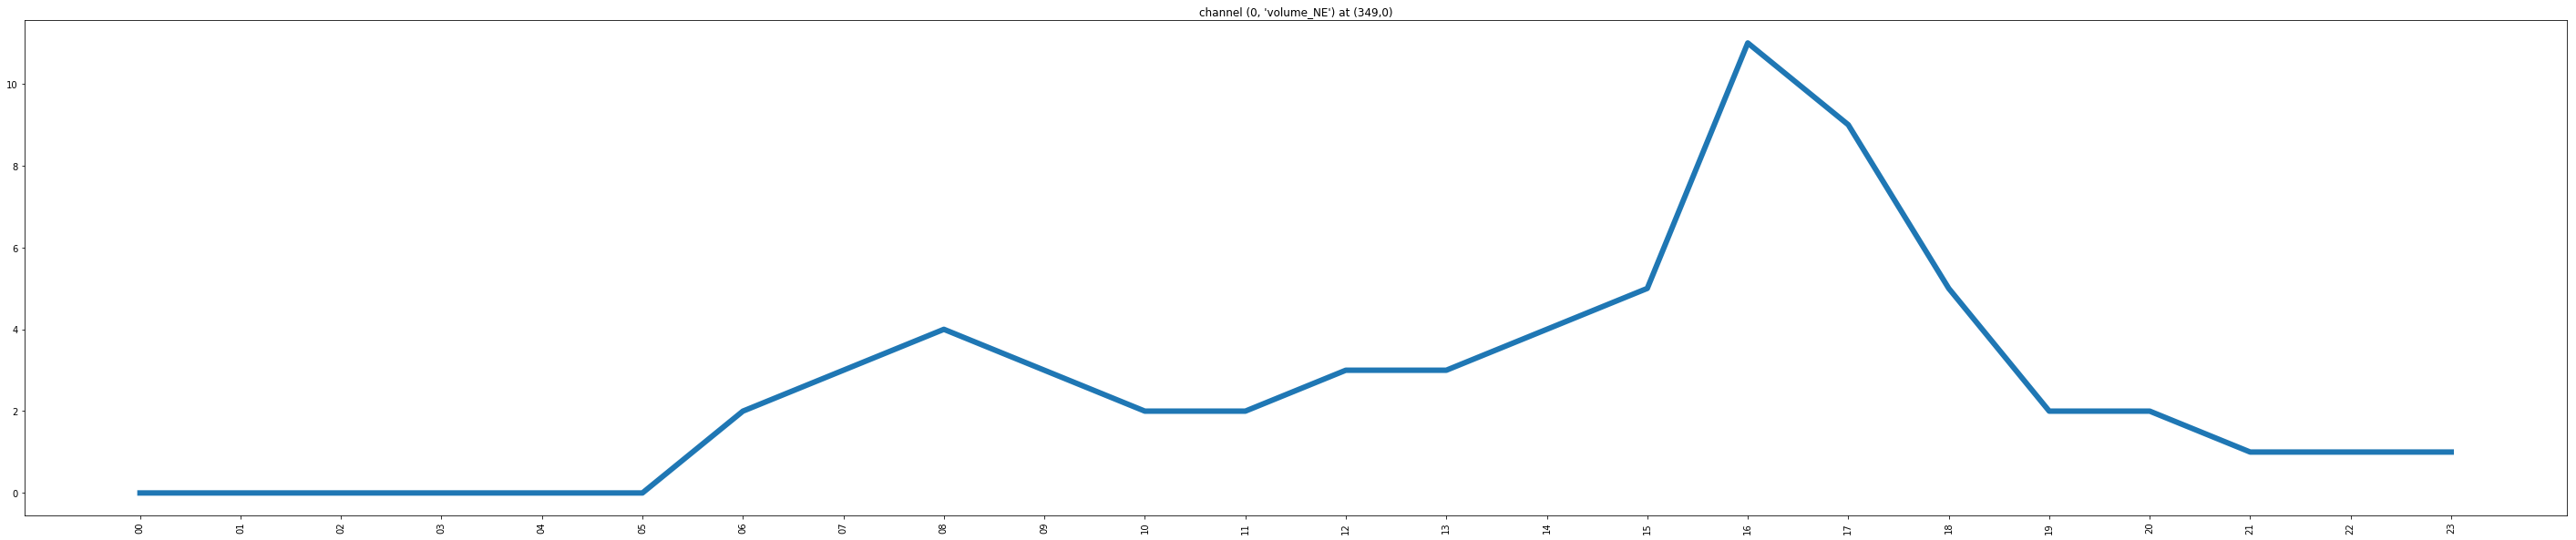

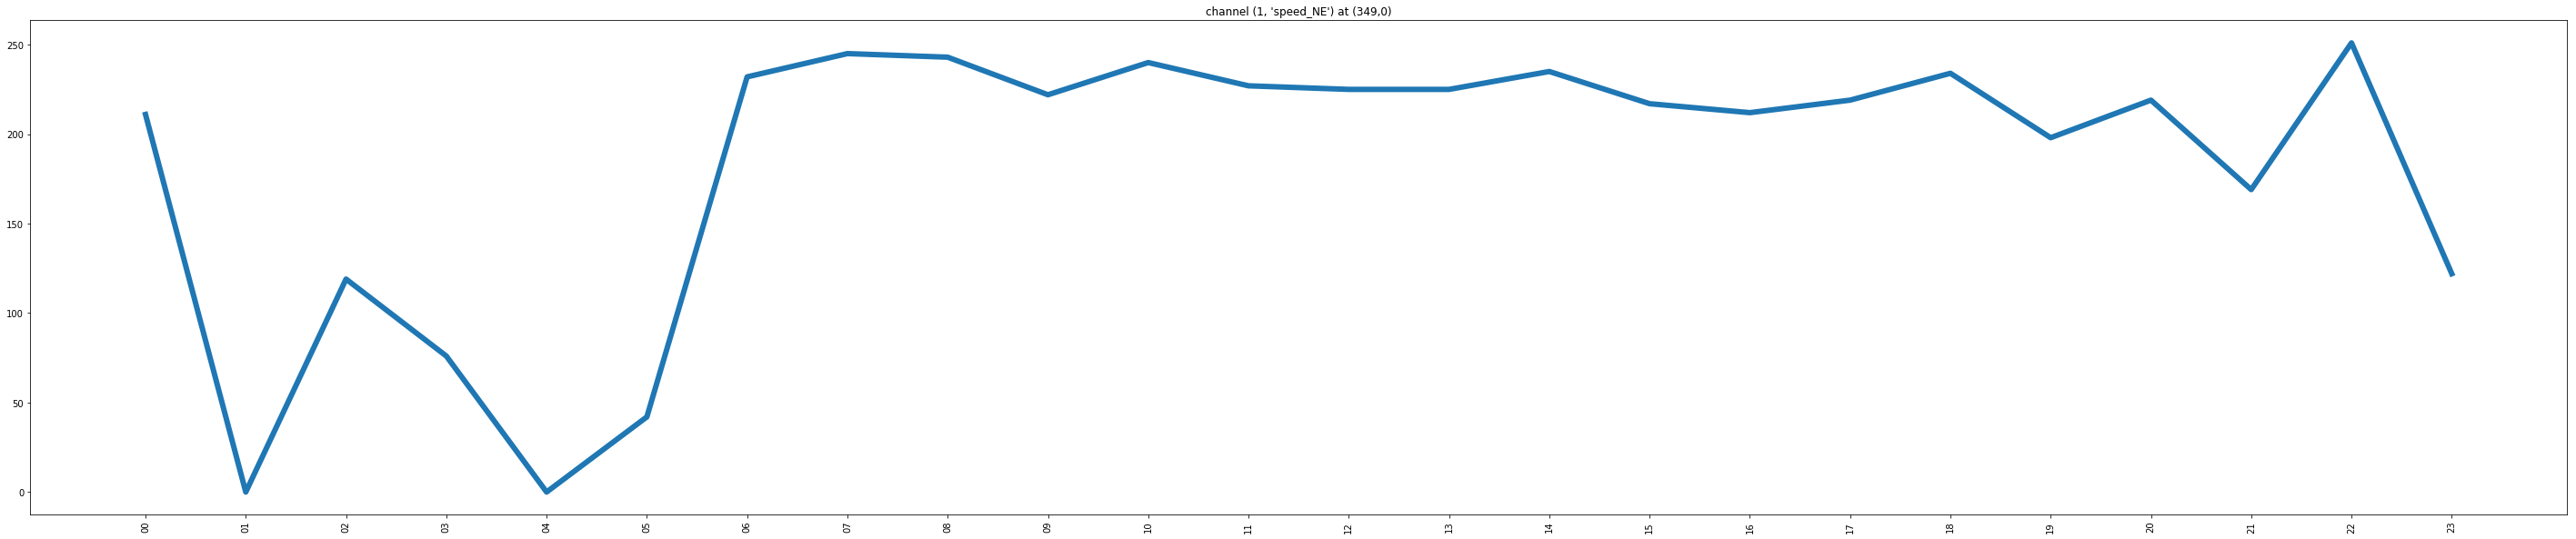

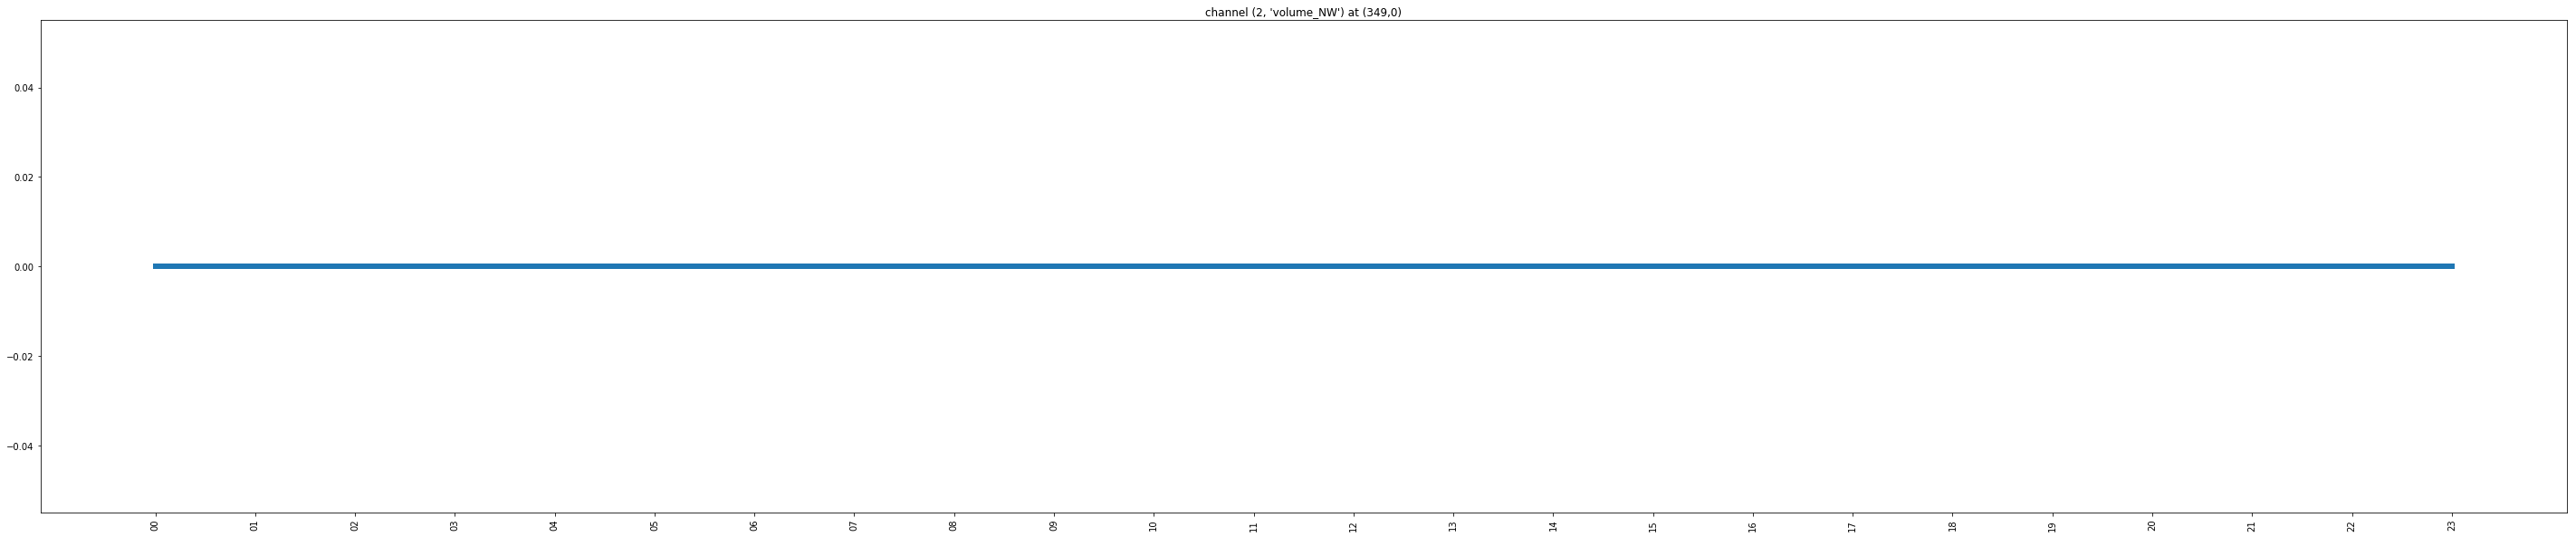

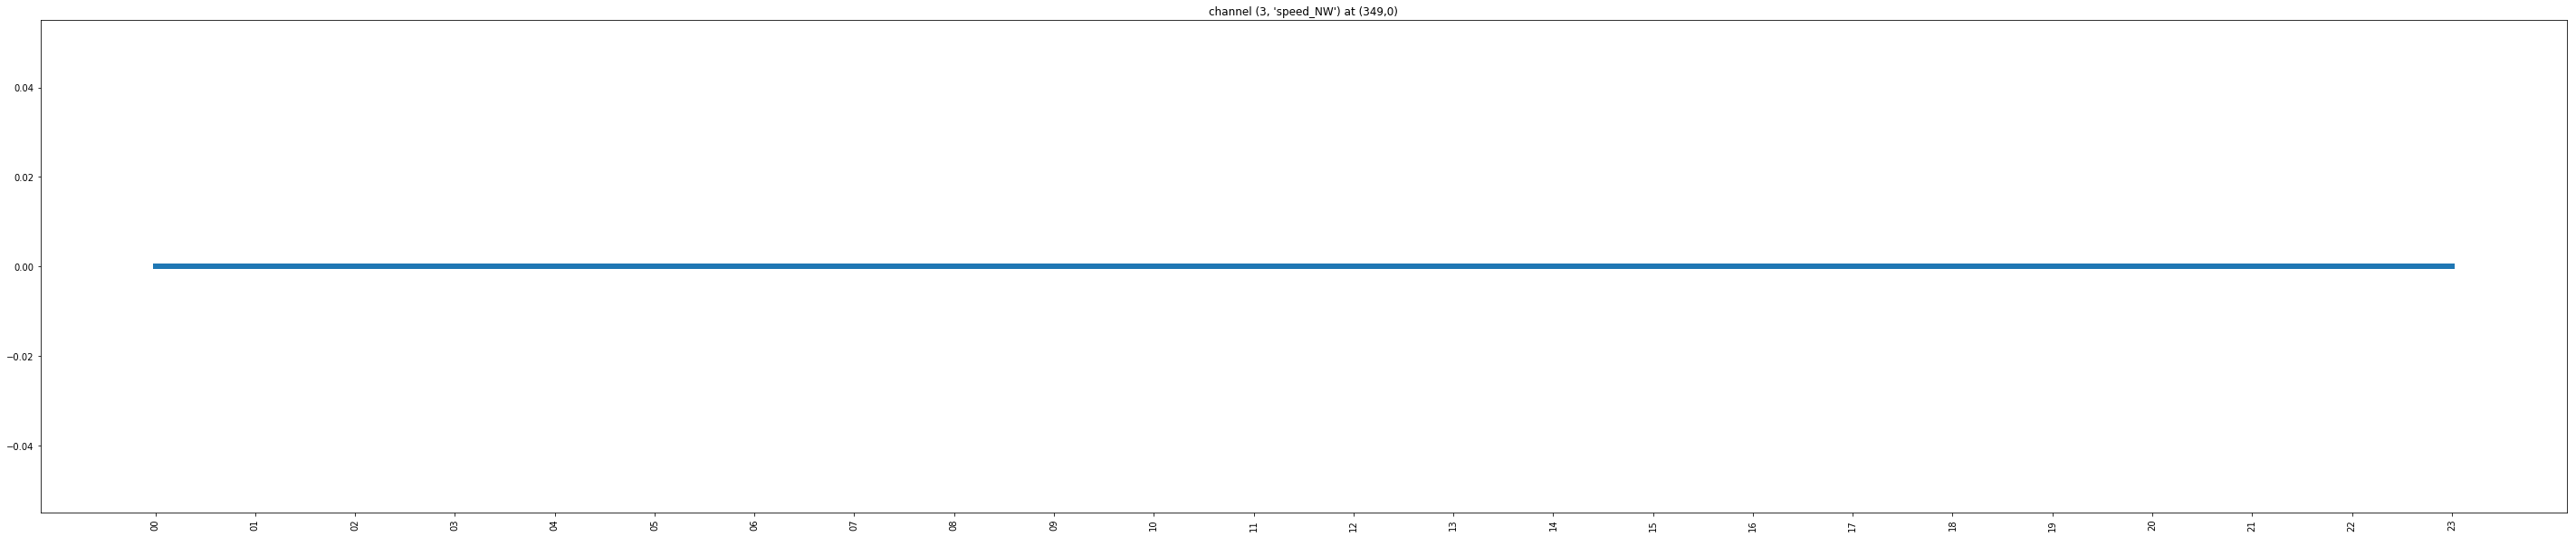

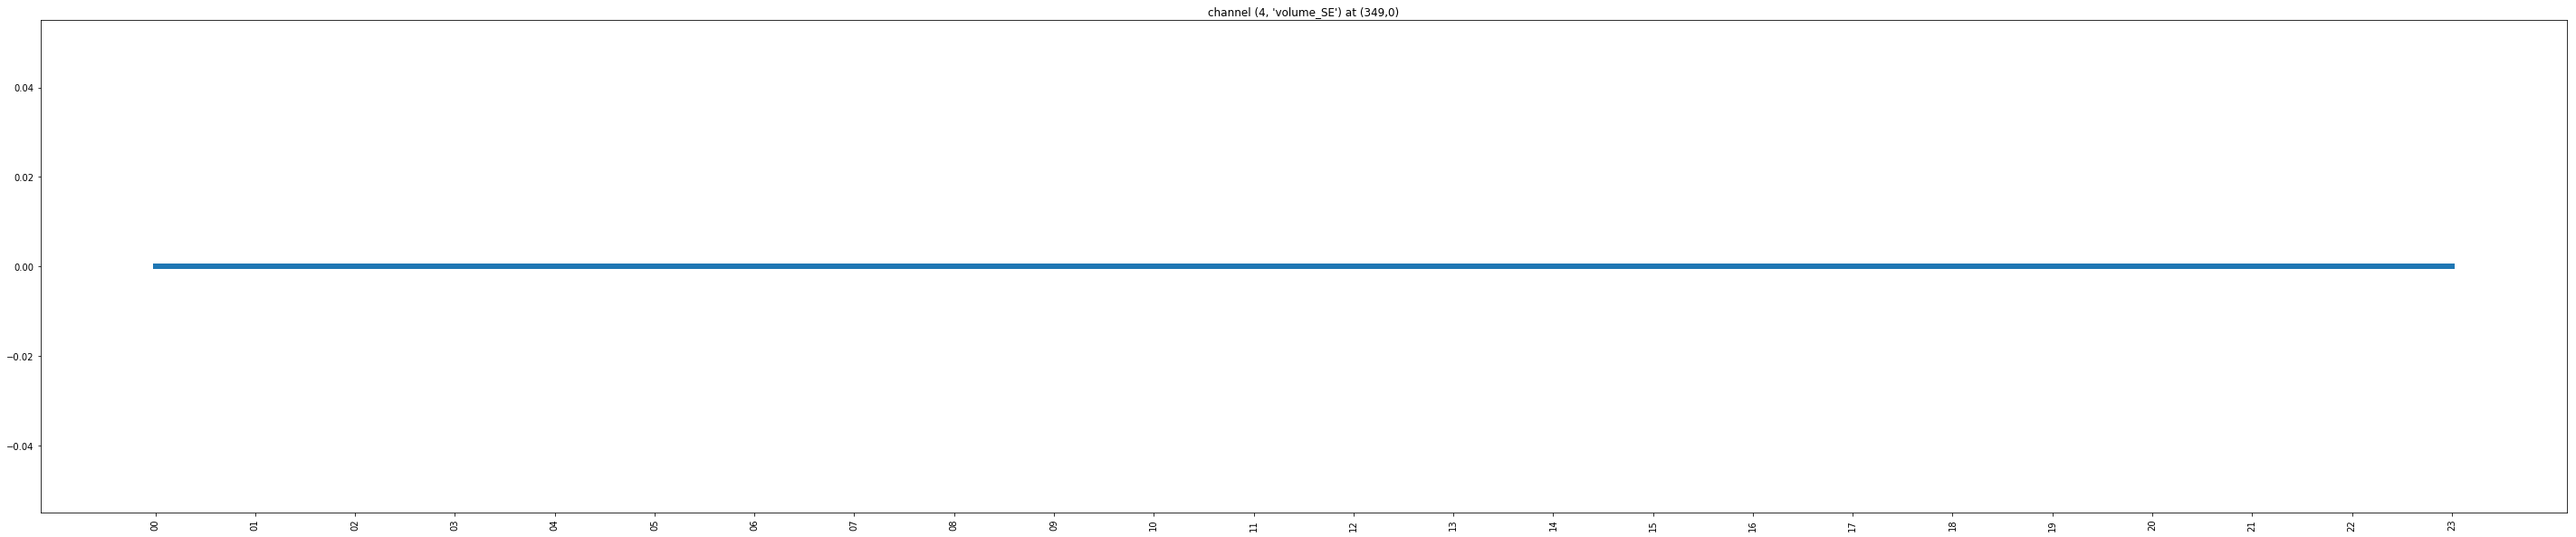

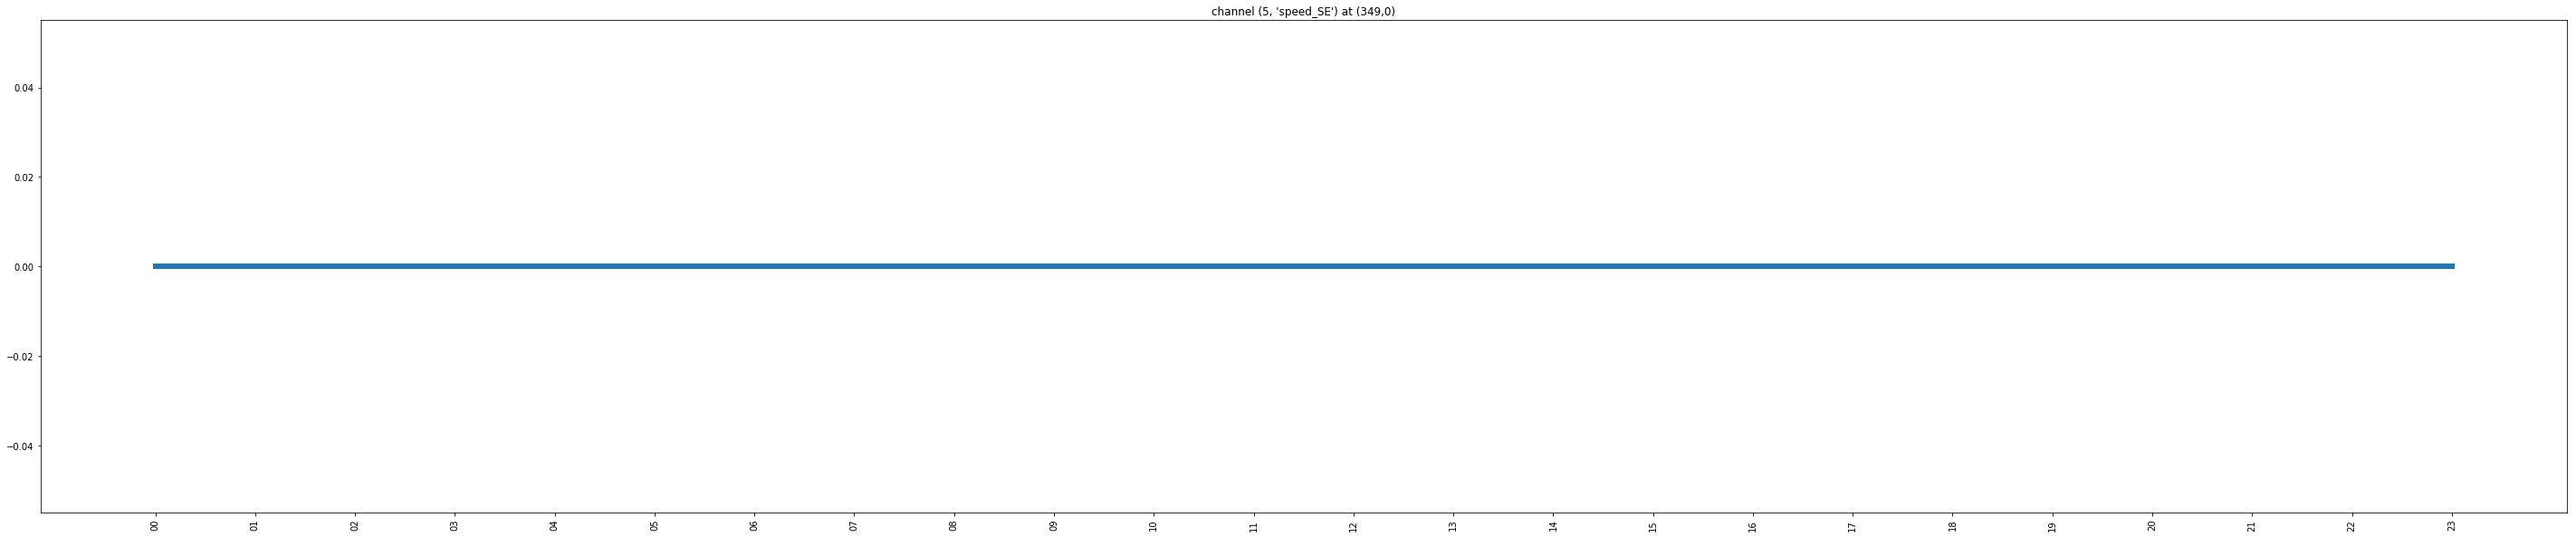

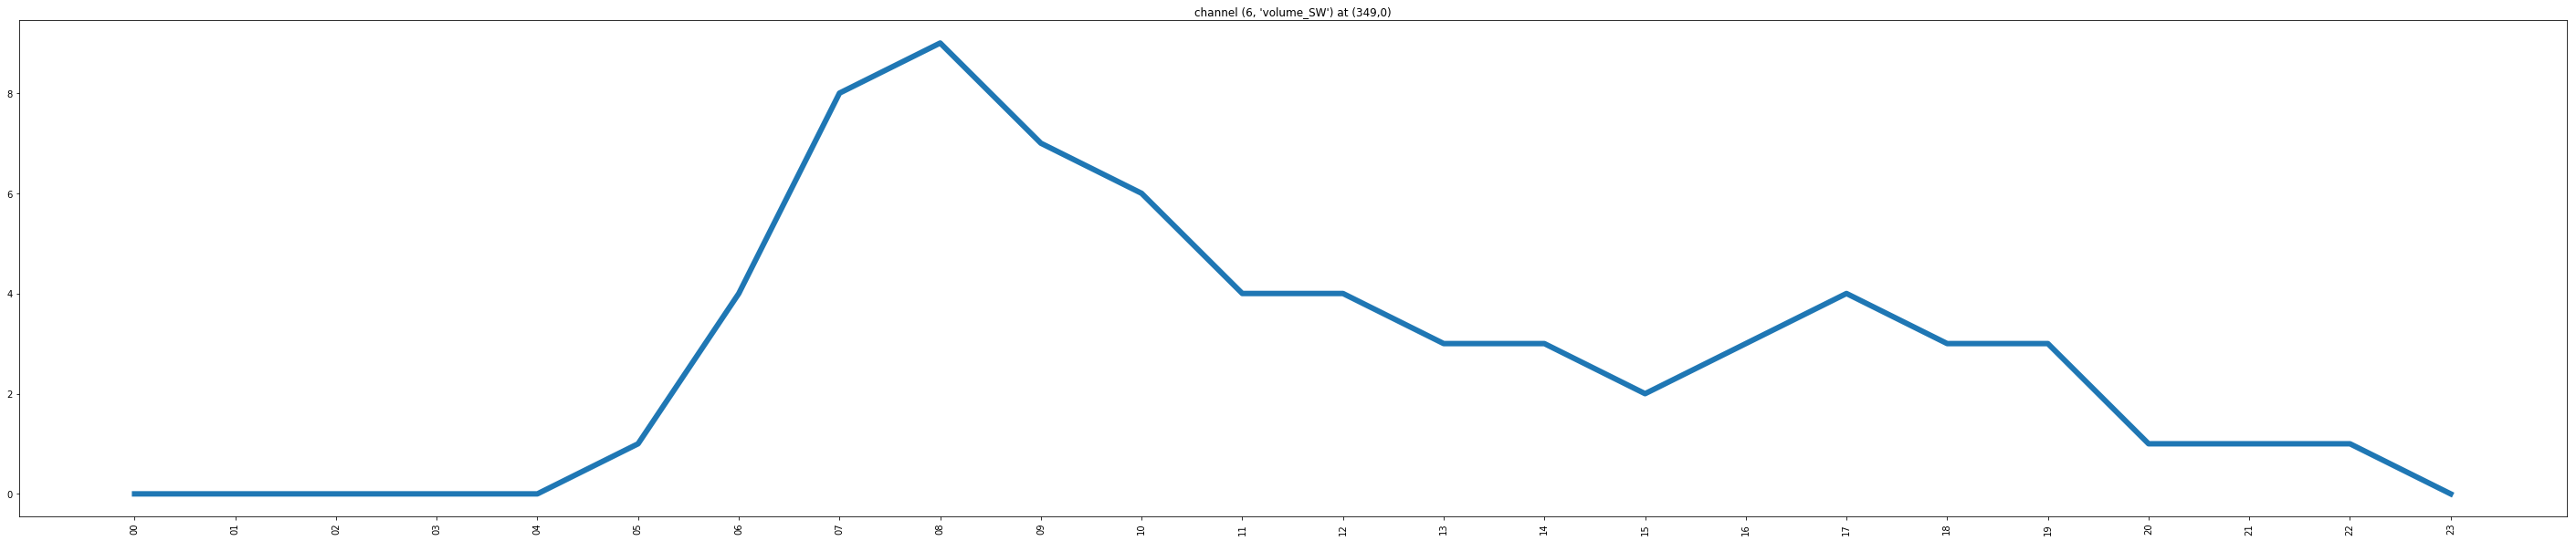

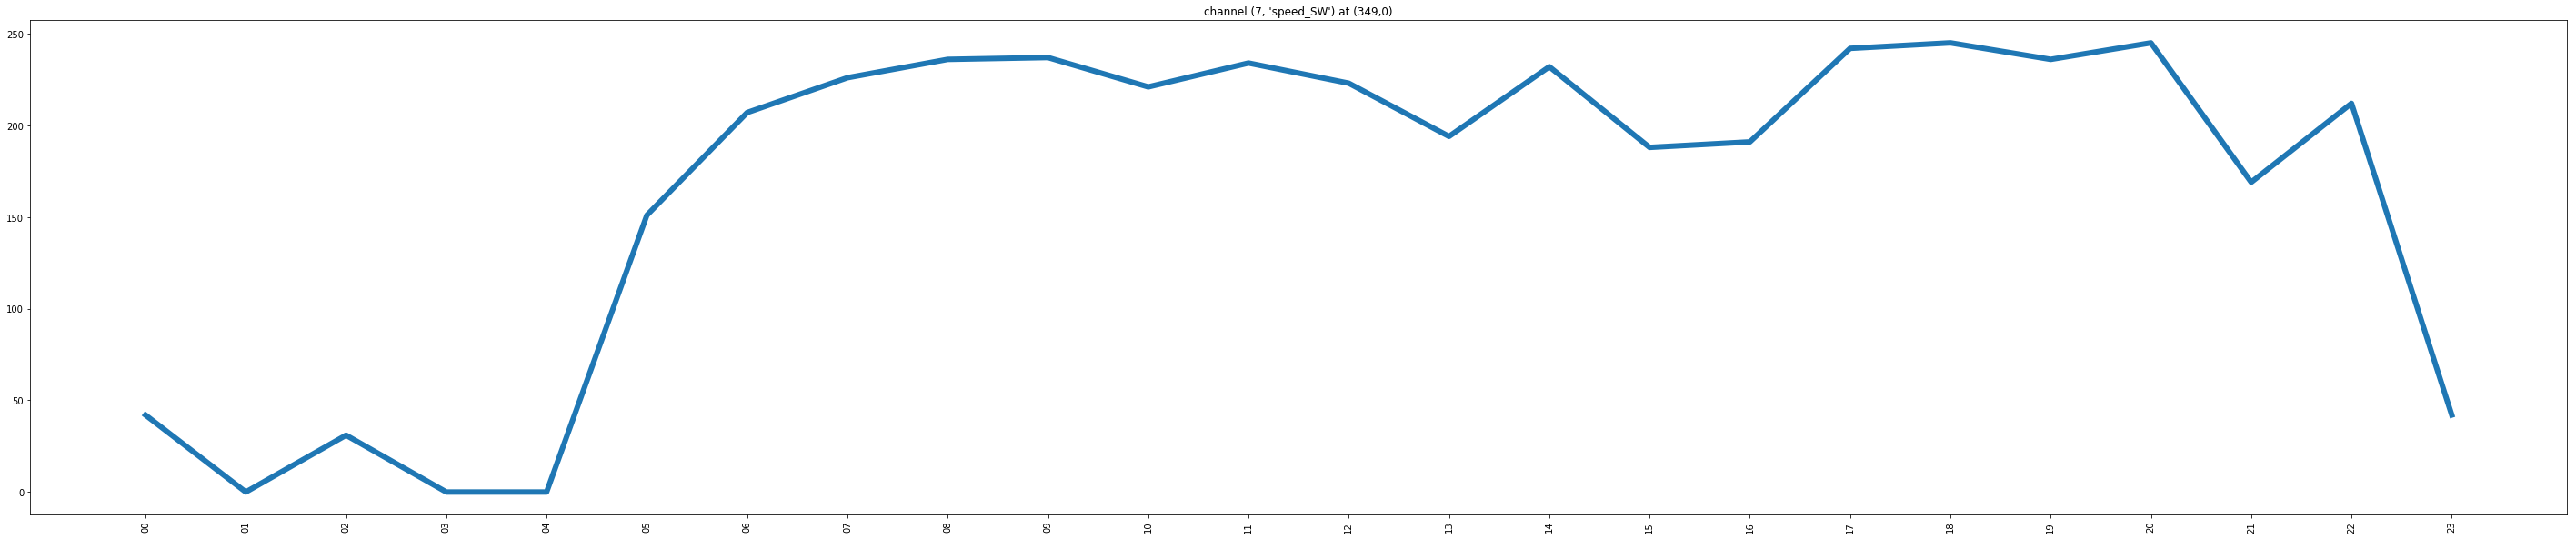

Loaded data has shape (24, 495, 436, 8) with dtype uint8 between 0 and 217
Reading pixel 200,364


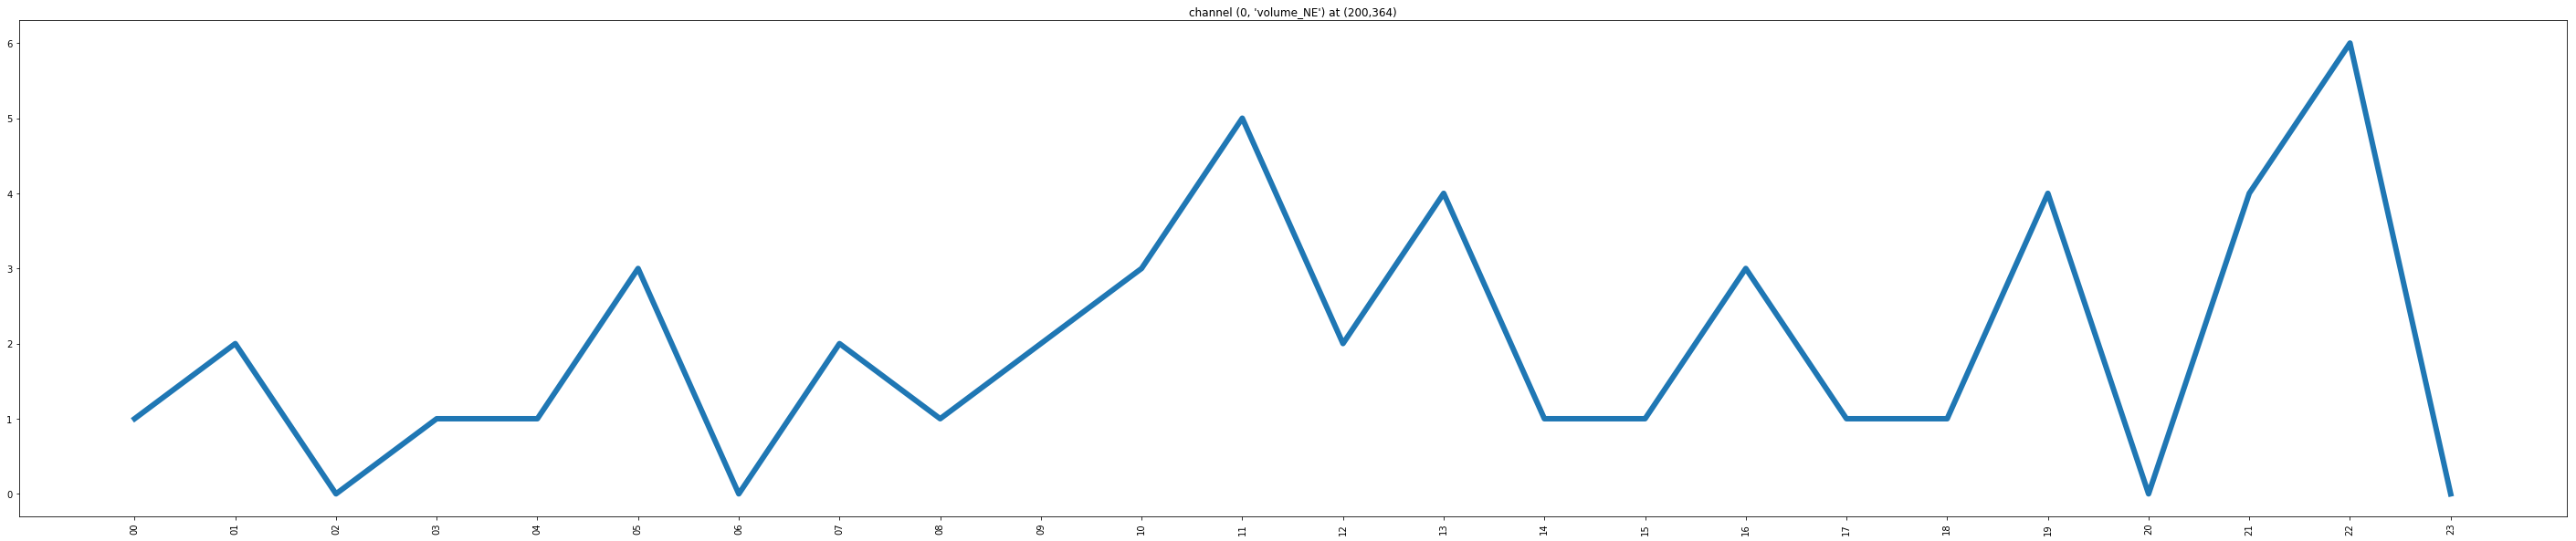

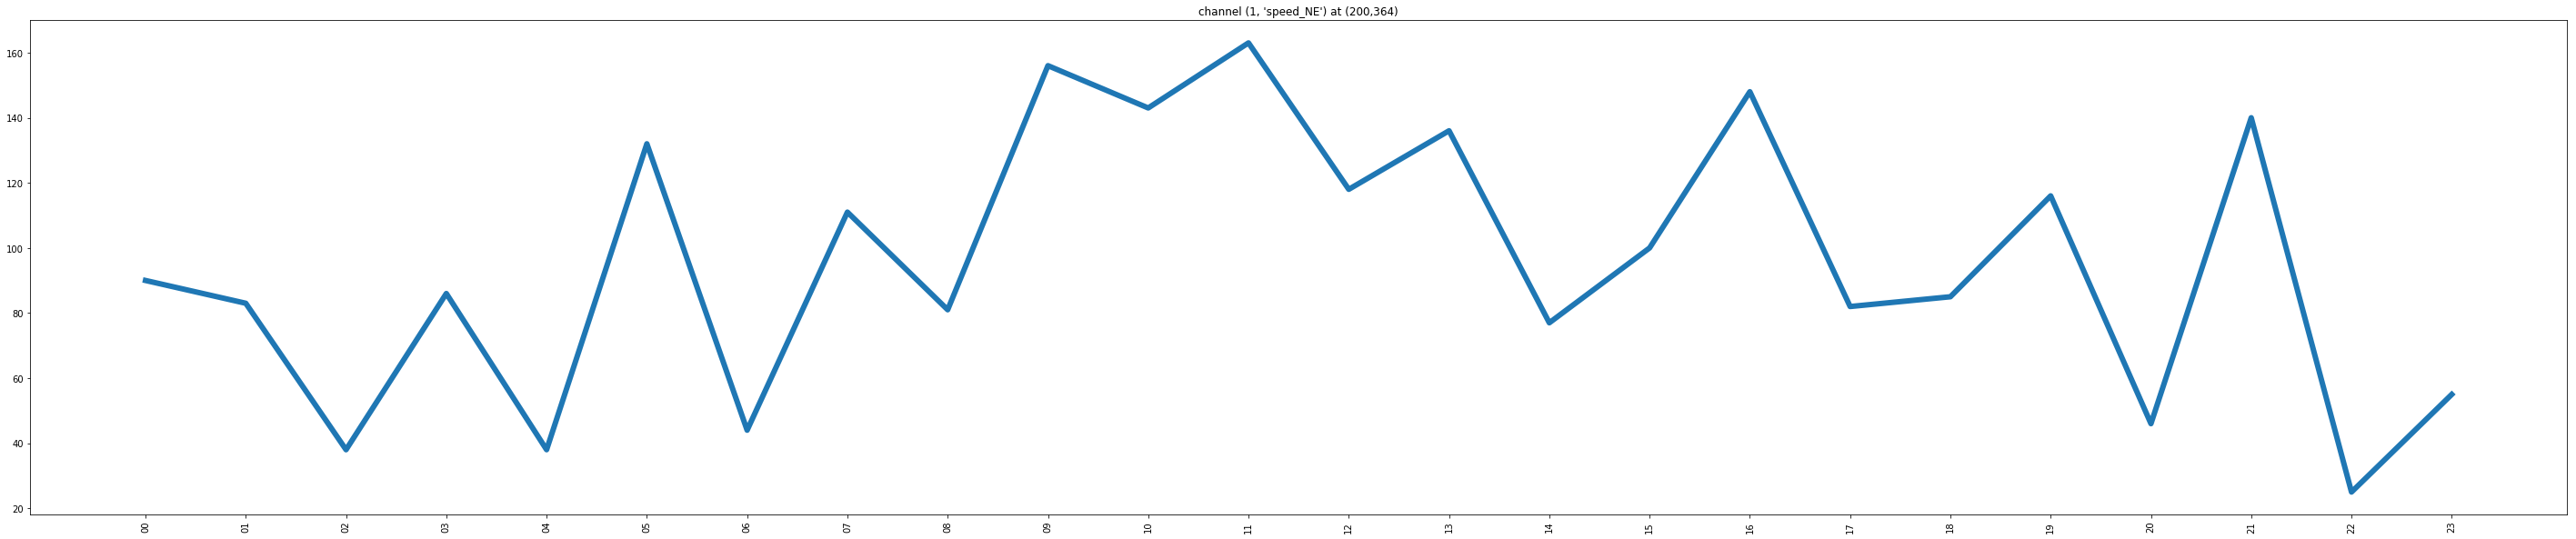

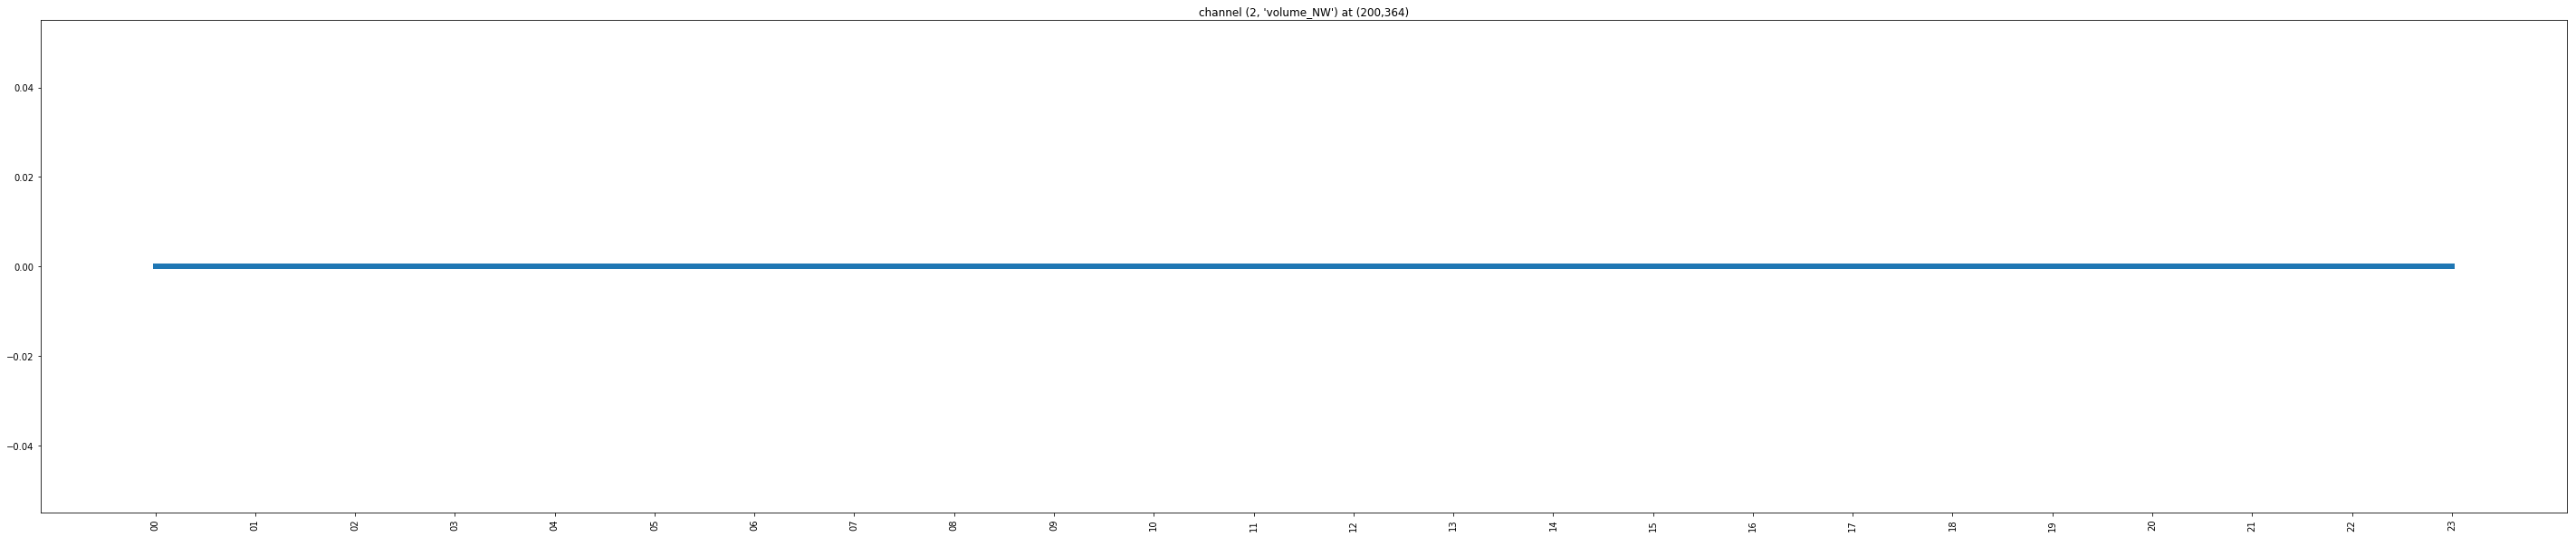

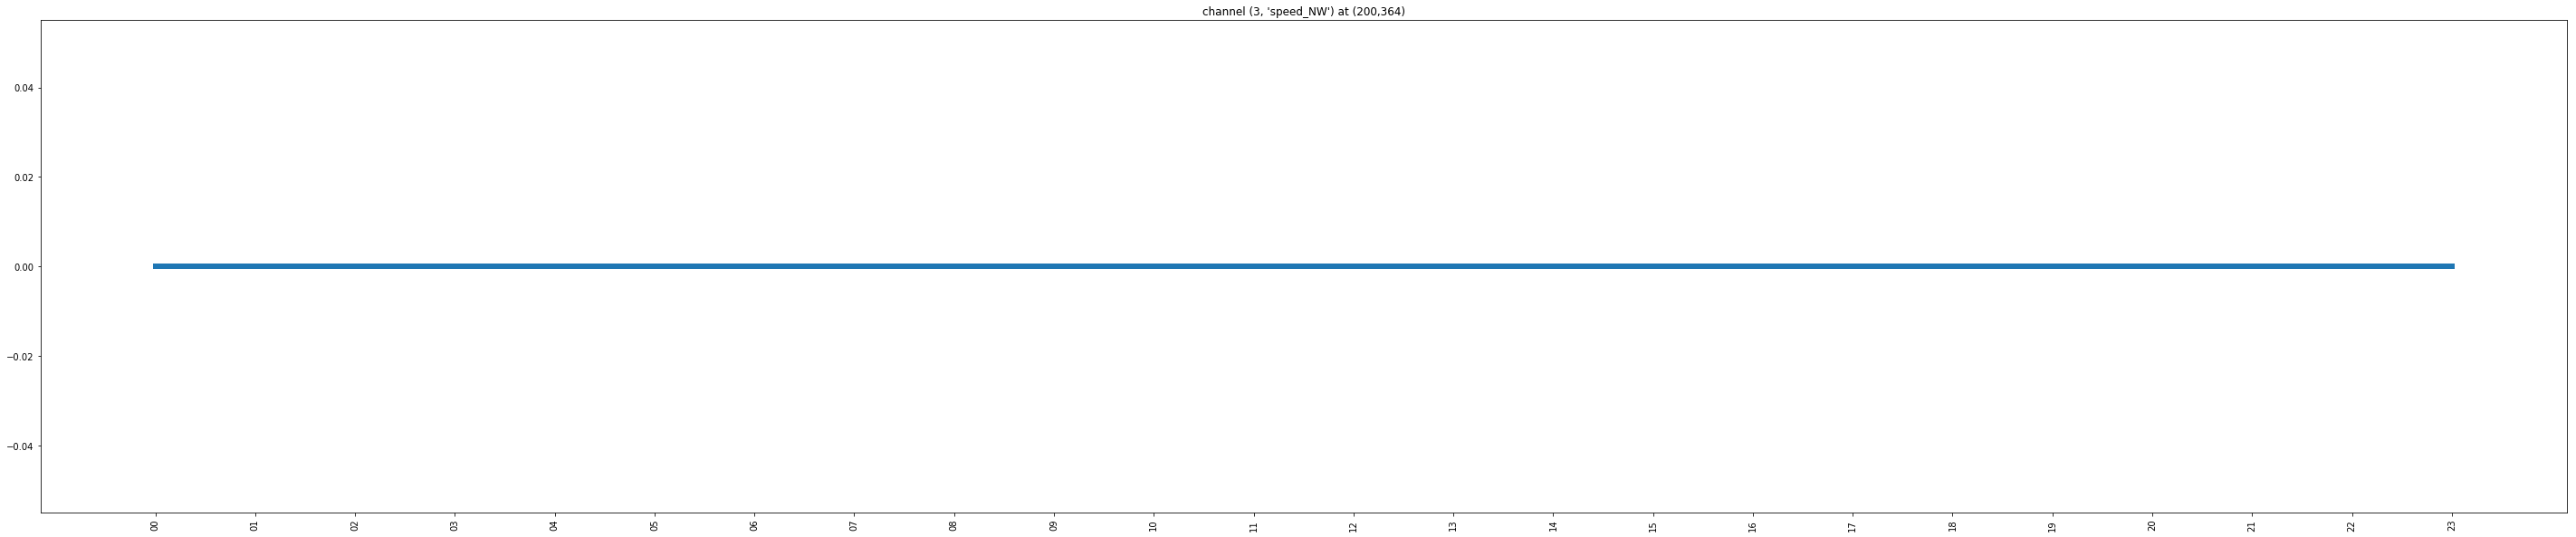

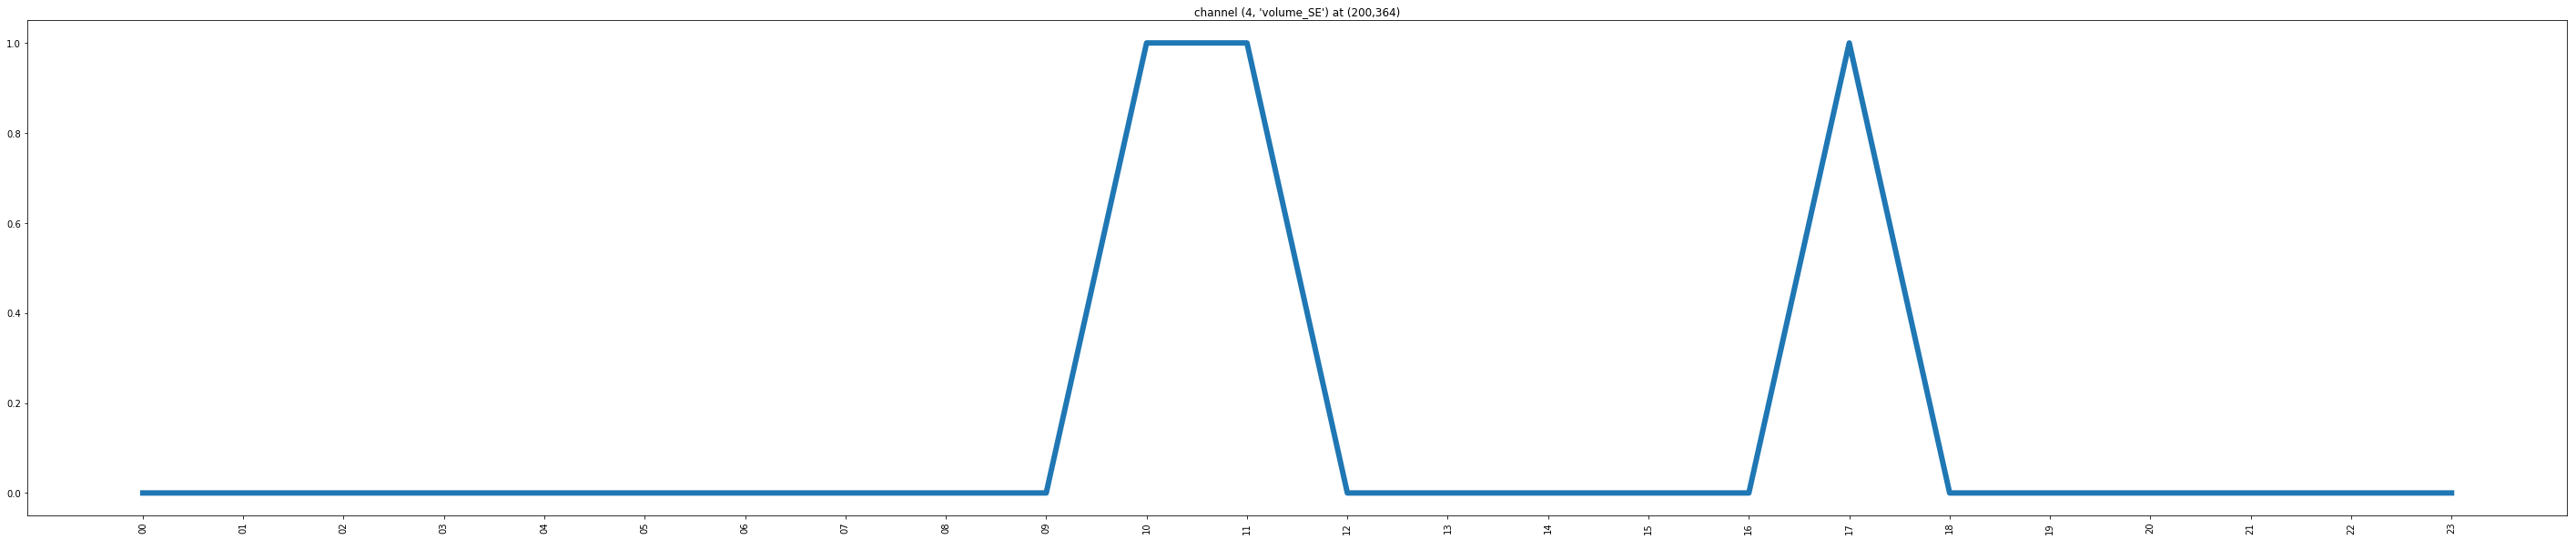

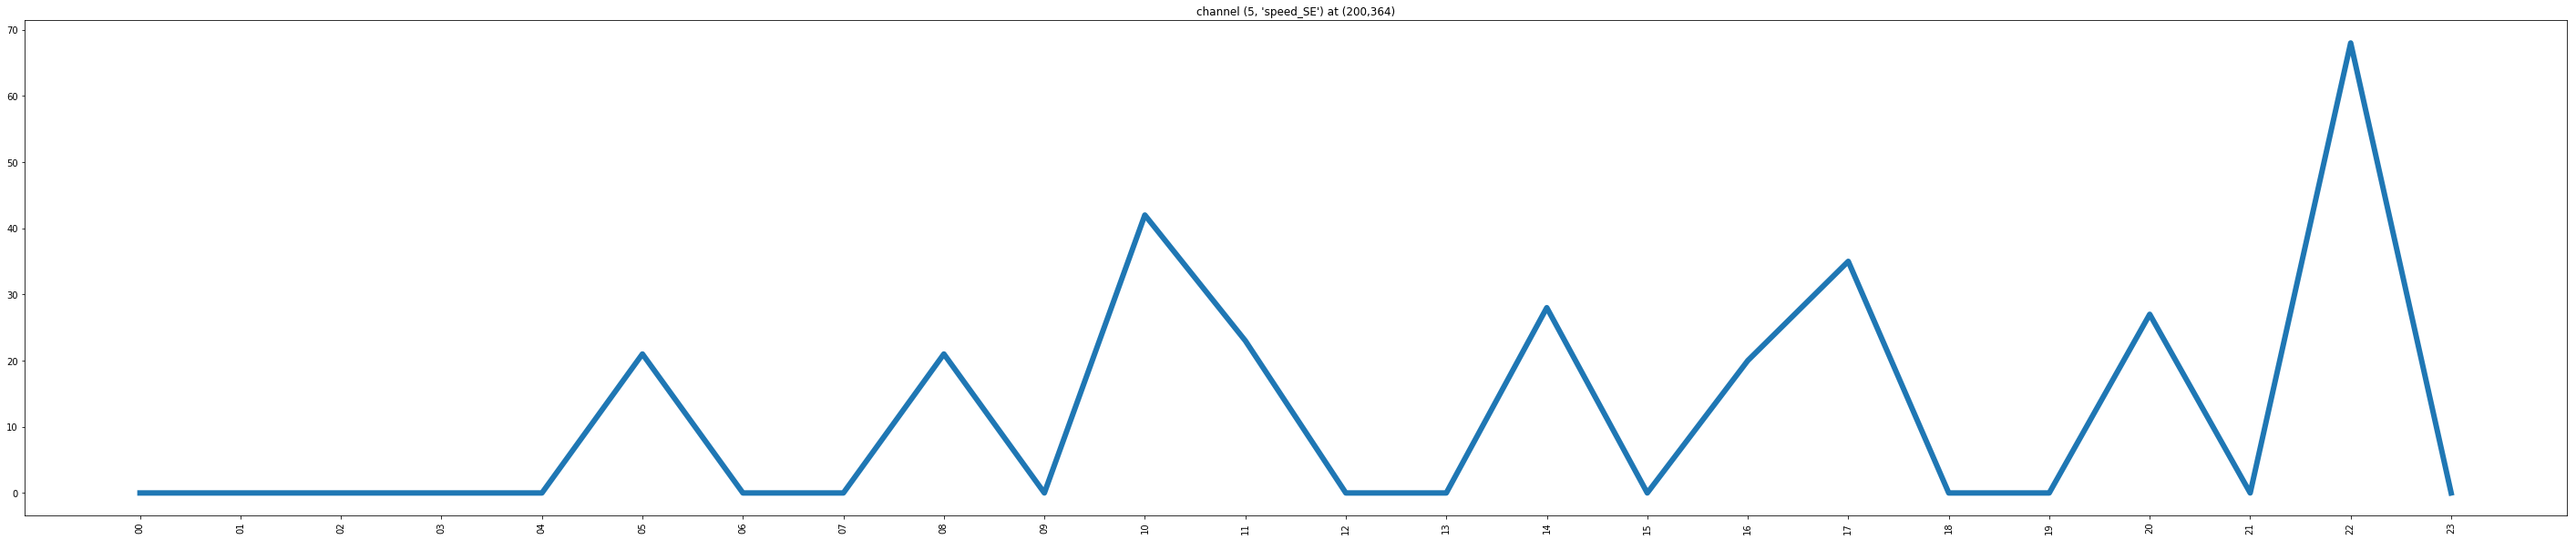

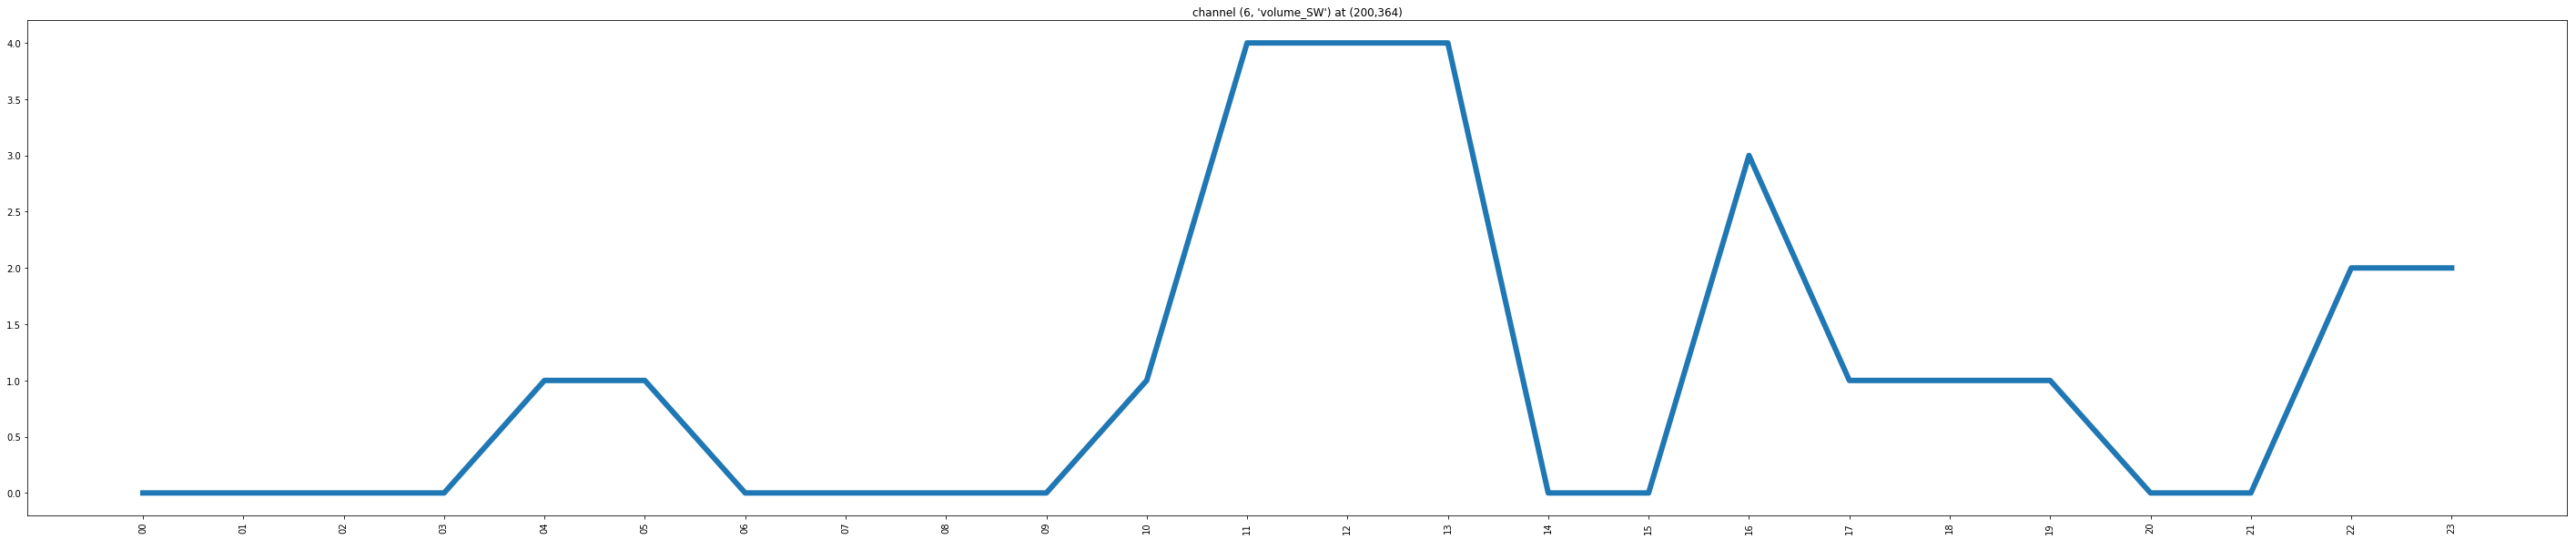

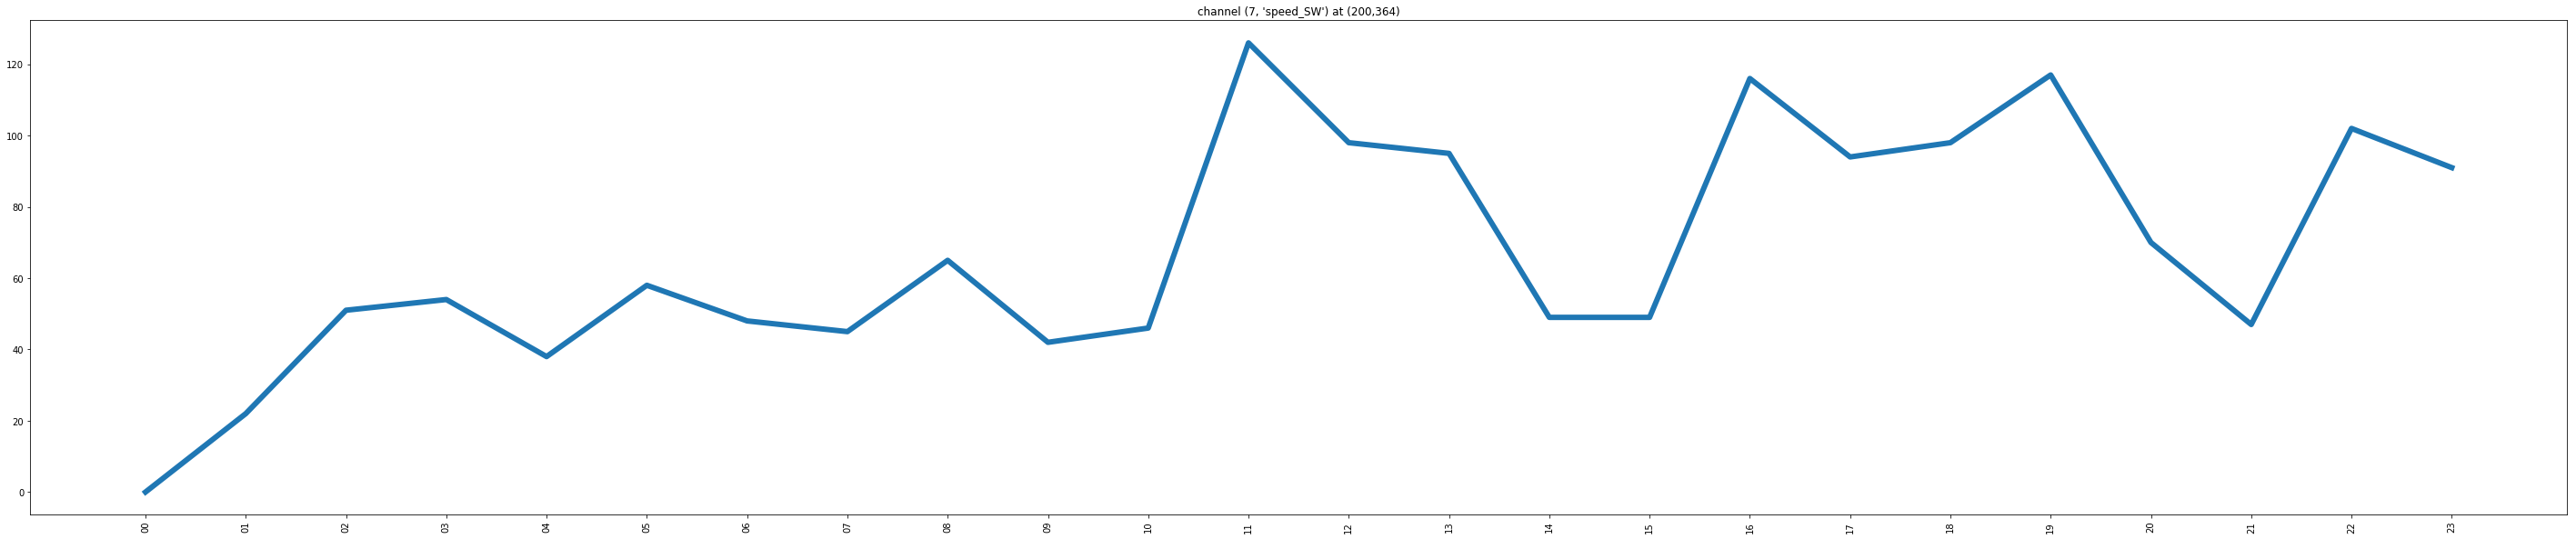

In [15]:
import datetime, os
rows = len(cities)
for city in cities:
    filename = f"{BASE_FOLDER}/{city}/training/2019-04-03_{city}_8ch_aggregated.h5"
    if os.path.isfile(filename):
        third_apr = load_h5_file(filename)
        print(f"Loaded data has shape {third_apr.shape} with dtype {third_apr.dtype} between {np.min(third_apr)} and {np.max(third_apr)}")

        dailysum = np.sum(third_apr, axis=(0))
        unravelled = np.unravel_index([np.argmax(dailysum[:, :, 1])], (495, 436))
        x = unravelled[0][0]
        y = unravelled[1][0]
        print(f"Reading pixel {x},{y}")

        for ch in range(third_apr.shape[3]):
            plt.figure(figsize=(50, 10))
            plt.title(f"channel {channels[ch]} at ({x},{y})")
            x_labels = [datetime.time(hour=t).isoformat(timespec="hours") for t in range(24)]
            plt.plot(x_labels, third_apr[:, x, y, ch], linewidth=6)
            plt.xticks(rotation=90)
            plt.show()

# Plotting aggregated traffic volumes before and during covid

In [16]:
import itertools

channel_labels = channel_labels = list(itertools.chain.from_iterable([[f"volume_{h}", f"speed_{h}"] for h in ["NE", "NW", "SE", "SW"]])) + ["incidents"]

pre_covid_range = generate_date_range("2019-04-01", "2019-04-10")
in_covid_range = generate_date_range("2020-04-01", "2020-04-10")
volume_channel_indices = [ch for ch, l in enumerate(channel_labels) if "volume" in l]

print(volume_channel_indices)

[0, 2, 4, 6]


In [17]:
import numpy as np

pre_covid_volumes = {city: np.zeros(shape=(495, 436)) for city in cities}
in_covid_volumes = {city: np.zeros(shape=(495, 436)) for city in cities}

for city in cities:
    for date in pre_covid_range:
        data = load_h5_file(f"{BASE_FOLDER}/{city}/training/{date}_{city}_8ch.h5")
        data = data[:, :, :, volume_channel_indices]
        pre_covid_volumes[city] += np.sum(data, axis=(0, -1))
    for date in in_covid_range:
        in_covid_volumes[city] += np.sum(load_h5_file(f"{BASE_FOLDER}/{city}/training/{date}_{city}_8ch.h5")[:, :, :, volume_channel_indices], axis=(0, -1))


In [18]:
print("pre_covid_range")
for city, volume in pre_covid_volumes.items():
    print(f"{city}: {np.sum(volume)}")
print("in_covid_range")
for city, volume in in_covid_volumes.items():
    print(f"{city}: {np.sum(volume)}")

pre_covid_range
MOSCOW: 732155698.0
BARCELONA: 23257227.0
ANTWERP: 41934886.0
BANGKOK: 60936302.0
in_covid_range
MOSCOW: 511333915.0
BARCELONA: 9847119.0
ANTWERP: 23836023.0
BANGKOK: 34764752.0


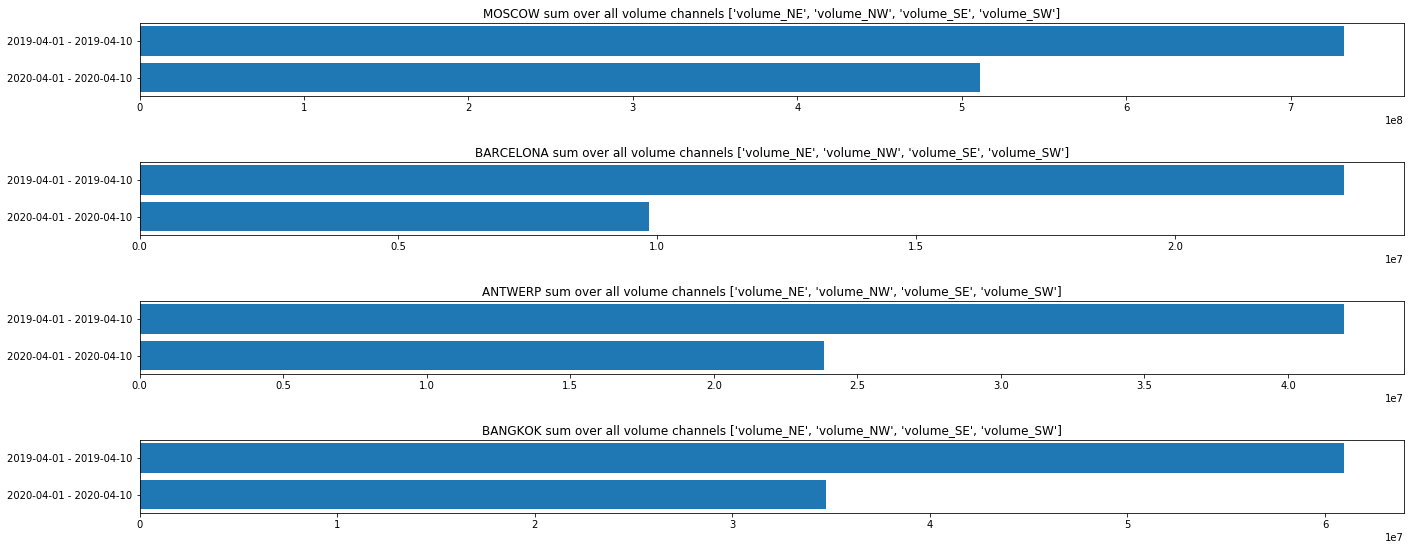

In [24]:
scale_factor = 2
fig, axs = plt.subplots(len(cities), 1, figsize=(scale_factor * 10, len(cities) * scale_factor))

for i, city in enumerate(cities):
    axs[i].set_title(f"{city} sum over all volume channels {[channel_labels[ch] for ch in volume_channel_indices]}")
    axs[i].barh(
        [f"{pre_covid_range[0]} - {pre_covid_range[-1]}", f"{in_covid_range[0]} - {in_covid_range[-1]}"],
        [np.sum(pre_covid_volumes[city]), np.sum(in_covid_volumes[city])],)
    axs[i].invert_yaxis()
fig.tight_layout(pad=2.0)